In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
!pip install geopandas

from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Define file paths
fatal_accidents_2022_path = '/content/drive/My Drive/DSA PROJECT DATASETS/fatal-car-accidents-by-state-2022.csv'
fatal_accidents_2023_path = '/content/drive/My Drive/DSA PROJECT DATASETS/fatal-car-accidents-by-state-2023.csv'

#Load the CSV files
fatal_accidents_2022_df = pd.read_csv(fatal_accidents_2022_path)
fatal_accidents_2023_df = pd.read_csv(fatal_accidents_2023_path)

#--- Clean 2022 Fatal Accidents dataset ---
fatal_accidents_2022_df = fatal_accidents_2022_df.drop(columns=['stateFlagCode'])
fatal_accidents_2022_df = fatal_accidents_2022_df.iloc[:, :3]  #keep only State, deaths, rate
fatal_accidents_2022_df.columns = [
    'State',
    'Deaths due to car accidents (2022)',
    'Car accident deaths per 100k (2022)'
]

#--- Clean 2023 Fatal Accidents dataset ---
fatal_accidents_2023_df = fatal_accidents_2023_df[['State', 'Car Accident Deaths', 'Car Accident Deaths per 100k']]
fatal_accidents_2023_df.columns = [
    'State',
    'Deaths due to car accidents (2023)',
    'Car accident deaths per 100k (2023)'
]

#--- Merge side by side ---
df_wide = pd.merge(fatal_accidents_2022_df, fatal_accidents_2023_df, on='State', how='inner')

#--- Reorder columns so that each metric’s years are adjacent ---
df_wide = df_wide[
    [
        'State',
        'Deaths due to car accidents (2022)',
        'Deaths due to car accidents (2023)',
        'Car accident deaths per 100k (2022)',
        'Car accident deaths per 100k (2023)'
    ]
]

#Save it to a csv
df_wide.to_csv('fatal_accidents_2022_2023_wide.csv', index=False)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Now we work on the dataset of Speed limits according to state
#We computed the average of rural and urban interstate speed limits to create a single
#'InterstateSpeedAvg' value for each state.

#Why this is useful:
#- Simplifies analysis by combining two related variables into one representative metric.
#- Helps compare states using a single value in correlations.
#- Smooths out minor rural/urban differences and highlights general speed policy.

#file path
speed_limits_path = '/content/drive/My Drive/DSA PROJECT DATASETS/speed-limits-by-state-2025.csv'

#Load the CSV file
df_speed = pd.read_csv(speed_limits_path)

df_speed = df_speed[['state', 'SpeedLimitsRuralInterstates', 'SpeedLimitsUrbanInterstates']]
df_speed = df_speed.rename(columns={'state': 'State'})

df_speed['Rural'] = pd.to_numeric(
    df_speed['SpeedLimitsRuralInterstates'].str.extract(r'(\d+)')[0],
    errors='coerce'
)
df_speed['Urban'] = pd.to_numeric(
    df_speed['SpeedLimitsUrbanInterstates'].str.extract(r'(\d+)')[0],
    errors='coerce'
)

df_speed['InterstateSpeedAvg'] = df_speed[['Rural', 'Urban']].mean(axis=1)
df_speed = df_speed[['State', 'InterstateSpeedAvg']]
df_speed.to_csv('speed_limits_interstate_avg.csv', index=False)

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#combining datasets which dont need much cleaning, just the removal of an empty column

#Load each state‑level file with its path
seatbelt_usage_path = '/content/drive/My Drive/DSA PROJECT DATASETS/state_seatbelt_use_2022_2023.csv'
automobiles_path = '/content/drive/My Drive/DSA PROJECT DATASETS/automobiles_by_state_2022_2023.csv'
road_quality_path = '/content/drive/My Drive/DSA PROJECT DATASETS/road-quality-by-state-2025.csv'
alcohol_consumption_path = '/content/drive/My Drive/DSA PROJECT DATASETS/alcohol-consumption-by-state-2025.csv'

df_seat = pd.read_csv(seatbelt_usage_path)
df_auto = pd.read_csv(automobiles_path)
df_road = pd.read_csv(road_quality_path)
df_alc  = pd.read_csv(alcohol_consumption_path)

#Standardize the “State” column name in each DataFrame
df_seat = df_seat.rename(columns={df_seat.columns[0]: 'State'})
df_auto = df_auto.rename(columns={df_auto.columns[0]: 'State'})

#stateflagcode is an empty column in alot of these datasets, so we check for it to remove it just incase.
if 'stateFlagCode' in df_road.columns:
    df_road = df_road.drop(columns=['stateFlagCode'])
df_road = df_road.rename(columns={'state': 'State'})

if 'stateFlagCode' in df_alc.columns:
    df_alc = df_alc.drop(columns=['stateFlagCode'])
df_alc  = df_alc.rename(columns={'state': 'State'})

#Rename for convenience (easier identification) and select only the columns you need
df_seat = df_seat.rename(columns={
    '2022': 'Seatbelt 2022',
    '2023': 'Seatbelt 2023'
})[['State', 'Seatbelt 2022', 'Seatbelt 2023']]

#reordering columns
df_road = df_road[[
    'State',
    'RoadQuality2022Ranking',
    'RoadQuality2023Ranking',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness'
]]

#renaming for easier identification
df_alc = df_alc.rename(columns={
    'AlcoholConsumption_EthanolConsumption_gallonsPerCapita_2022': 'Ethanol per Capita (2022)',
    'AlcoholConsumption_ExcessiveDrinkingRate_pctOfPopulation_2022': 'Excessive Drinking % (2022)',
    'AlcoholConsumption_DrivingFatalitiesInvolvingAlcohol_pct_2022': 'Alcohol Fatalities % (2022)',
    'AlcoholConsumption_EthanolConsumption_gallonsPerCapita_2023': 'Ethanol per Capita (2023)',
    'AlcoholConsumption_ExcessiveDrinkingRate_pctOfPopulation_2023': 'Excessive Drinking % (2023)',
    'AlcoholConsumption_DrivingFatalitiesInvolvingAlcohol_pct_2023': 'Alcohol Fatalities % (2023)'
})

#reordering and selecting the needed columns from the dataset
df_alc = df_alc [[
    'State',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'Ethanol per Capita (2023)',
    'Excessive Drinking % (2023)',
    'Alcohol Fatalities % (2023)'
]]

#Merge them all on based on state. We will then further combine this dataset with other cleaned and handled data.
merged = (
    df_seat
    .merge(df_auto, on='State', how='inner')
    .merge(df_road, on='State', how='inner')
    .merge(df_alc,  on='State', how='inner')
)

#saving the combined dataset
merged.to_csv('merged_state_data.csv', index=False)

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Here we read one of the last datasets that we need to handle, the Vehicle inspection dataset.
#Define file path
no_inspection_states_path = '/content/drive/My Drive/DSA PROJECT DATASETS/states-without-vehicle-inspection-2025.csv'

#Read the full CSV, skipping any bad lines
df_vi = pd.read_csv(
    no_inspection_states_path,
    engine='python',
    on_bad_lines='skip'  #Drop rows with the wrong number of fields
)


#Drop the flag‐code column and the free‑text details column
df_vi = df_vi.drop(columns=[
    'stateFlagCode',
    'StatesWithoutVehicleInspection_AdditionalDetails'
])

#Rename for consistency and easier identification
df_vi = df_vi.rename(columns={
    'state': 'State',
    'StatesWithoutVehicleInspection_SafetyInspectionRequirement': 'SafetyInspectionRequirement'
})

def rank_inspection(value):
    value = str(value).strip().lower()
    if "biennial" in value or "bi-annual" in value:
        return 1
    elif "single" in value or "once" in value:
        return 0.5
    elif "annual" in value and "none" in value:
        return 1.5
    elif "annual" in value:
        return 2
    elif value == '' or value == 'nan':
        return 0
    else:
        return 0

df_vi['InspectionRank'] = df_vi['SafetyInspectionRequirement'].apply(rank_inspection)

#Save cleaned and ranked dataset
df_vi.to_csv('states_without_inspection_cleaned.csv', index=False)

#So what we did basically here is  that we ranked vehicle inspection requirements by strictness
#We assigned numerical ranks to the `SafetyInspectionRequirement` column to reflect how strict
#each state's policy is (e.g., Annual = 2, Biennial = 1, etc.).
#Why this is helpful:
#- Enables quantitative analysis of inspection strictness.
#- Makes it easier to compare with other numerical variables (e.g., accident rates).
#- Captures policy variation more meaningfully than a simple binary (yes/no) format (that would be too general/unspecific).
#- Most importantly, it takes care of missing values

#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#Now we combine all of these datasets into a single final one.
#Load the already‑cleaned, state‑keyed CSVs
df_fatal   = pd.read_csv('fatal_accidents_2022_2023_wide.csv')      #cleaned fatal accidents 2022/23
df_speed   = pd.read_csv('speed_limits_interstate_avg.csv')         #cleaned interstate speed averages
df_state   = pd.read_csv('merged_state_data.csv')                   #cleaned seatbelt/auto/road/alc data
df_inspect = pd.read_csv('states_without_inspection_cleaned.csv')   #cleaned inspection

#Merge them all on "State"
df_all = (
    df_fatal
      .merge(df_speed,   on='State', how='inner')
      .merge(df_state,   on='State', how='inner')
      .merge(df_inspect, on='State', how='inner')
)

#save it to a final csv
df_all.to_csv('all_state_data_merged.csv', index=False)


In [ ]:
#Adding new columns (Normalisation and furter cleaning of the dataset)
#Further cleaning and organisation of data to make it more useful
#Going to set up more columns so hypothesis testing is easier

from google.colab import data_table

#Load the merged dataset first
df = pd.read_csv('all_state_data_merged.csv')

#---------------------------------- Death Percentage Calculation ----------------------------------

#Analysis: Calculating Car Accident Deaths as a Percentage of Registered Automobiles

#To gain deeper insights into state-level traffic safety, we calculated the percentage of
#deaths due to car accidents relative to the total number of registered automobiles in each state,
#for both 2022 and 2023.

#Formula used:
#Death Percentage = (Car Accident Deaths / Registered Automobiles) * 100

#Why This Calculation Is Important
#1) Adjusts for Population & Vehicle Volume:
#- Raw death counts alone do not account for how many vehicles are on the road.
#- A state with more cars will naturally have more accidents, but not necessarily a higher *rate* of danger.
#- This percentage normalizes the data, enabling fair comparisons across states regardless of their size or vehicle count.

#2) Enables Better Cross-State Comparisons
#- By converting to a percentage, we can compare states like California (with millions of vehicles) to smaller states more meaningfully.
#- It helps identify states with disproportionately high accident death rates per vehicle, highlighting areas for policy focus.

#Calculating accident deaths as a percentage of automobiles adds critical context to the raw fatality numbers.
#It allows for more meaningful analysis by accounting for vehicle density and enabling fair, standardized comparisons
#across different regions and years.

#Drop previous versions if they exist to avoid duplication
df = df.drop(columns=[col for col in df.columns if col.startswith('DeathPercentage_')], errors='ignore')

#Now we calculate death percentages
df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100
df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

#Round the values
df['DeathPercentage_2022'] = df['DeathPercentage_2022'].round(4)
df['DeathPercentage_2023'] = df['DeathPercentage_2023'].round(4)

#Reorder columns so DeathPercentage appears after Automobiles columns
cols = list(df.columns)
for col in ['DeathPercentage_2022', 'DeathPercentage_2023']:
    if col in cols:
        cols.remove(col)

insert_index = max(cols.index('Automobiles_2022'), cols.index('Automobiles_2023')) + 1
cols.insert(insert_index, 'DeathPercentage_2022')
cols.insert(insert_index + 1, 'DeathPercentage_2023')

df = df[cols]

#---------------------------------- Total Deaths Calculation ----------------------------------

#we will now combine car accident deaths from 2022 and 2023 into a single total column
#We will create a new column `TotalDeaths_2022_2023` to sum the number of deaths due to car accidents
#across both years for each state.

#why this is needed:
#- Smooths out anomalies: If one year had unusually high or low deaths due to temporary factors
#(e.g., natural disasters, lockdowns, policy changes), summing both years reduces year-specific noise.
#- Enables fairer comparisons: When comparing with other non-year-specific variables like
#'InterstateSpeedAvg', using a two-year total avoids skewed interpretations.
#- Enhances trend detection: Combining years can help identify consistently high- or low-risk states,
#rather than reacting to single-year fluctuations.

#Drop previously created TotalDeaths column if it exists
df = df.drop(columns=[col for col in df.columns if col.startswith('TotalDeaths_2022_2023')], errors='ignore')

#Now we calculate total deaths over 2022 and 2023
df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Reorder columns to insert new column after the 2023 deaths column
cols = list(df.columns)
if 'TotalDeaths_2022_2023' in cols:
    cols.remove('TotalDeaths_2022_2023')
insert_index = cols.index('Deaths due to car accidents (2023)') + 1
cols.insert(insert_index, 'TotalDeaths_2022_2023')

df = df[cols]

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#save the cleaned and updated dataset
df.to_csv('all_state_data_merged.csv', index=False)

In [ ]:
#The final dataset
#Showing the DataFrame as an interactive table
data_table.DataTable(df)

,State,Deaths due to car accidents (2022),Deaths due to car accidents (2023),TotalDeaths_2022_2023,Car accident deaths per 100k (2022),Car accident deaths per 100k (2023),InterstateSpeedAvg,Seatbelt 2022,Seatbelt 2023,Automobiles_2022,...,RoadQualityUrbanPavementRoughness,RoadQualityRuralPavementRoughness,Ethanol per Capita (2022),Excessive Drinking % (2022),Alcohol Fatalities % (2022),Ethanol per Capita (2023),Excessive Drinking % (2023),Alcohol Fatalities % (2023),SafetyInspectionRequirement,InspectionRank
0,California,4428,4285,8713,11.3,10.9,67.5,95.3,96.2,13796109,...,44,5,2.63,18.8,27.7,2.49,18.0,29.0,NaN,0.0
1,Texas,4408,4498,8906,14.7,15.2,75.0,90.4,90.6,7674216,...,19,2,2.41,19.6,25.4,2.26,17.3,29.9,Annual,2.0
2,Florida,3530,3738,7268,15.9,17.1,67.5,88.3,89.4,7763368,...,5,1,2.74,20.2,22.0,2.61,17.4,28.2,NaN,0.0
3,Georgia,1797,1797,3594,16.5,16.7,70.0,89.3,87.6,3412234,...,5,1,1.91,17.8,20.7,1.90,16.8,23.4,NaN,0.0
4,North Carolina,1630,1663,3293,15.2,15.7,70.0,90.9,92.2,3276070,...,8,1,2.31,16.5,25.9,2.17,14.9,32.3,Annual,2.0
5,Tennessee,1314,1327,2641,18.6,19.0,70.0,90.5,91.9,2312012,...,9,2,2.30,17.2,23.5,2.14,11.2,28.0,NaN,0.0
6,Arizona,1302,1180,2482,17.7,16.2,70.0,87.0,87.8,2200806,...,12,4,2.24,17.4,22.3,2.25,16.0,27.6,NaN,0.0
7,Ohio,1275,1354,2629,10.8,11.5,67.5,80.8,84.8,3986322,...,16,2,2.12,20.7,32.5,2.03,19.2,34.3,NaN,0.0
8,Illinois,1268,1334,2602,10.1,10.5,62.5,93.0,92.9,3730443,...,21,6,2.42,22.9,28.8,2.39,21.2,34.2,NaN,0.0
9,Pennsylvania,1179,1230,2409,9.1,9.5,70.0,89.9,87.7,3738754,...,21,4,2.32,19.8,25.4,2.34,18.1,32.0,Annual,2.0


### **Choropleth Analysis: Total Fatal Car Accidents by State (2022–2023)**


This map shows the total fatal car accidents in U.S. States (2022-2023) highlighting key regional patterns.
*   High fatalities are concentrated in large, populous states like Texas, California, and Florida, likely due to more vehicles, longer road networks, and denser traffic.
*   Lower totals appear in smaller states like Vermont, Rhode Island, and Wyoming, which have fewer residents and vehicles.
*   The map shows absolute deaths, not adjusted for population so it doesn’t reflect risk per person or per mile driven.

The map highlights regional differences in traffic fatalities and points to
areas that may benefit from targeted safety measures.

In [ ]:
import plotly.express as px
import plotly.io as pio

#Ensure Plotly renders in Colab
pio.renderers.default = 'colab'

#Load the correct dataset
df = pd.read_csv('all_state_data_merged.csv')
df['State'] = df['State'].str.strip()

#Ensure TotalDeaths column exists
if 'TotalDeaths_2022_2023' not in df.columns:
    df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Use built-in GeoJSON for US states (Plotly’s version with full names)
geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'

#Plot choropleth using purple color scale
fig = px.choropleth(df,
                    geojson=geojson_url,
                    locations='State',
                    featureidkey='properties.name',
                    color='TotalDeaths_2022_2023',
                    color_continuous_scale='Reds',
                    scope='usa',
                    title='Total Fatal Car Accidents by State (2022–2023)'
                   )

fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),   # Reduce padding
    height=600,  #Optional: set a consistent height
    geo=dict(center=dict(lat=38, lon=-95))  #Rough center of USA
)
fig.show()

### **Comparison of Death Rates per State (2022 vs 2023)**

Building on the earlier choropleth that showed total state-wise fatalities, this bar chart shifts focus to **vehicle-normalized death percentages**, offering a fairer comparison across states. It presents fatality rates per registered vehicle for each U.S. state in 2022 and 2023, sorted in descending order based on 2023 values. This normalization removes the influence of population size and total vehicle count, allowing for a clearer assessment of relative fatality rates.


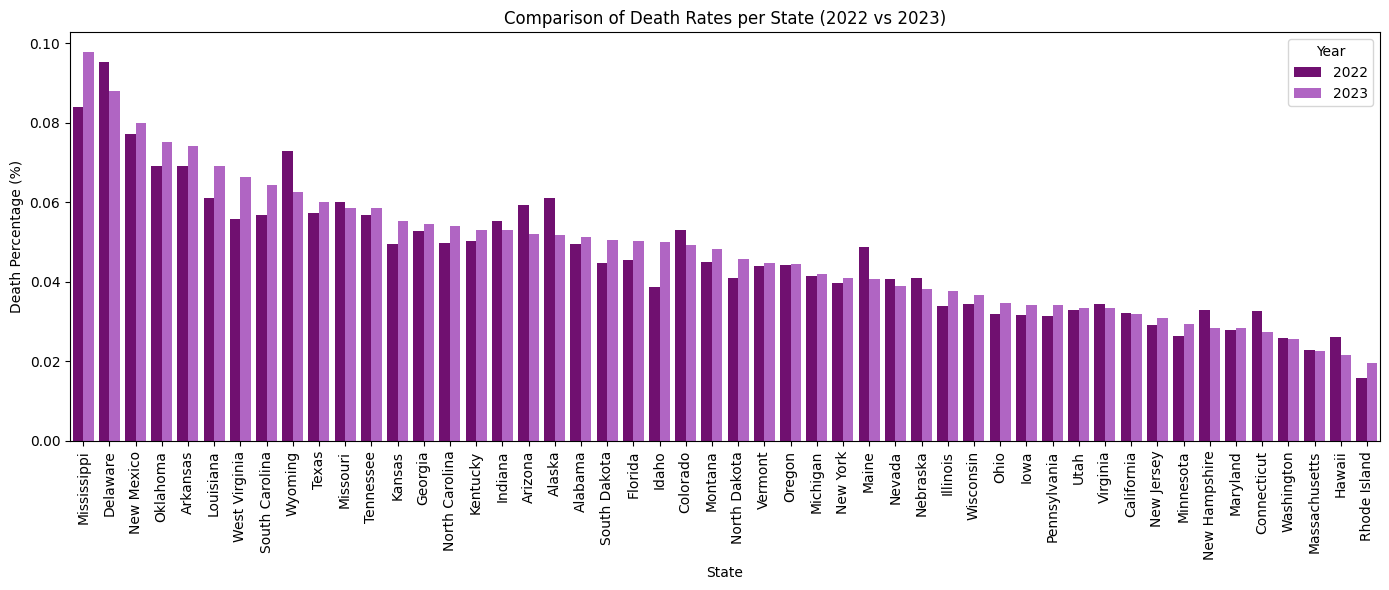

In [ ]:
#Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

#Ensure death percentages are calculated
if 'DeathPercentage_2022' not in df.columns:
    df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100
if 'DeathPercentage_2023' not in df.columns:
    df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

#Change the data format
df_melted = df[['State', 'DeathPercentage_2022', 'DeathPercentage_2023']].melt(
    id_vars='State',
    var_name='Year',
    value_name='DeathPercentage'
)

#Sort states by 2023 values in descending order (we will only use 2023 for this)
state_order = df.sort_values(by='DeathPercentage_2023', ascending=False)['State']

#Custom color palette for hue
custom_palette = {'DeathPercentage_2022': 'maroon', 'DeathPercentage_2023': 'green'}

#Rename columns to match hue labels in palette
df_melted['Year'] = df_melted['Year'].replace({
    'DeathPercentage_2022': '2022',
    'DeathPercentage_2023': '2023'
})

#Adjust the palette mapping accordingly
custom_palette = {'2022': '#800080', '2023': '#BA55D3'}

#Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='State', y='DeathPercentage', hue='Year', order=state_order, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Comparison of Death Rates per State (2022 vs 2023)')
plt.ylabel('Death Percentage (%)')
plt.tight_layout()
plt.show()



*   **Mississippi**, **Alabama**, and **New Mexico** consistently show the highest death percentages in both years, highlighting states with the most elevated normalized fatality rates.  
*   Many states exhibit **minimal variation between years**, indicating overall consistency in fatality risk.
*   Some states such as **Arkansas**, **Montana**, and **Alaska** show a **notable decline** in death percentages from 2022 to 2023.
*   At the lower end of the scale, **Massachusetts**, **Rhode Island**, and **New Jersey** report the lowest fatality rates in both years.


This comparison enables a more precise identification of patterns and changes in road fatalities over time, independent of state size or total crash volume.

### **Correlation Analysis of Car Accident Factors**

To begin the analysis, we first test our main hypothesis by examining the relationships between fatal car accidents and various potential influencing factors. Additionally, we explore the correlations between other key variables related to car accidents. This initial step helps identify which factors are most closely associated with fatalities and may warrant further investigation.

### Hypothesis

**Null Hypothesis (H₀):**  
There is no significant relationship between fatal car accident rates and factors such as speed limits, alcohol consumption, road quality, vehicle inspection requirements, seatbelt usage, or the number of vehicles per capita across U.S. states.

**Alternative Hypothesis (H₁):**  
At least one of these factors — speed limits, alcohol consumption, road quality, vehicle inspection requirements, seatbelt usage, or vehicles per capita — has a significant relationship with fatal car accident rates across U.S. states.


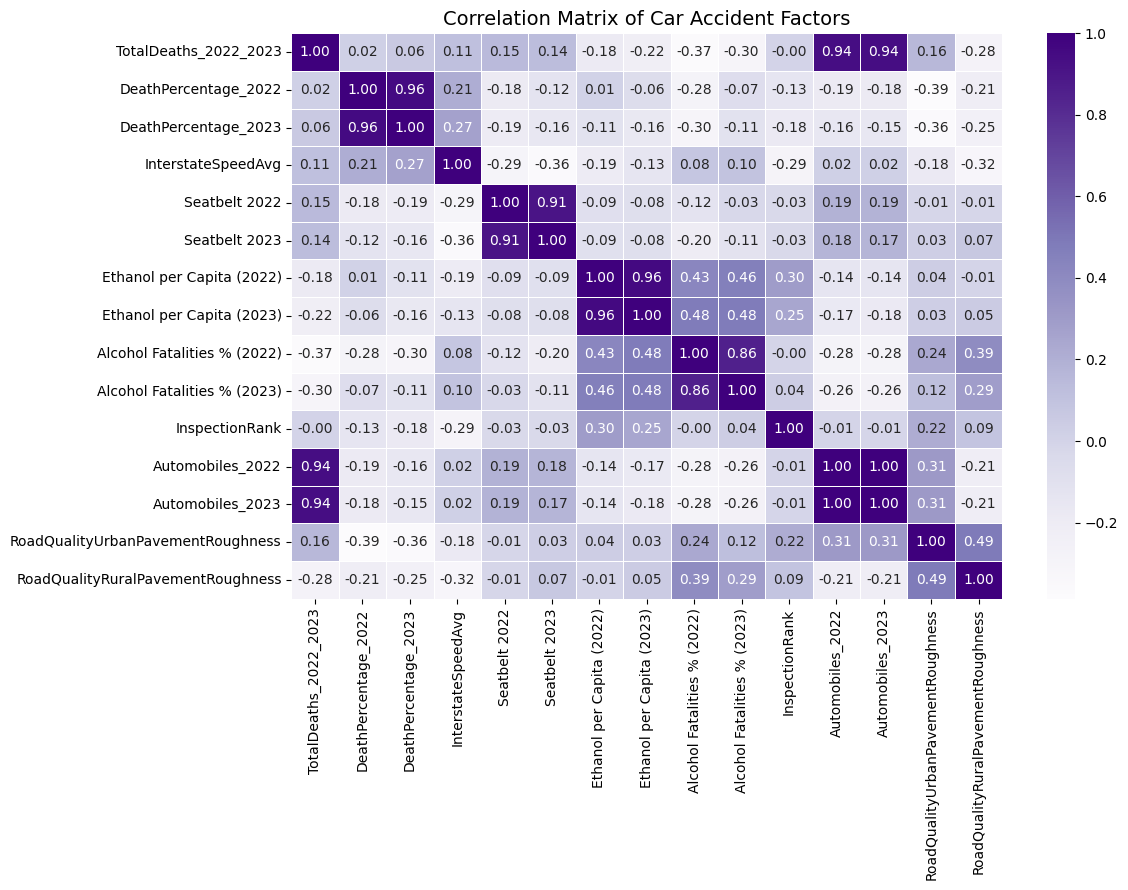

In [ ]:
#Select the relevant columns
correlation_columns = [
    'TotalDeaths_2022_2023',
    'DeathPercentage_2022',
    'DeathPercentage_2023',
    'InterstateSpeedAvg',
    'Seatbelt 2022',
    'Seatbelt 2023',
    'Ethanol per Capita (2022)',
    'Ethanol per Capita (2023)',
    'Alcohol Fatalities % (2022)',
    'Alcohol Fatalities % (2023)',
    'InspectionRank',
    'Automobiles_2022',
    'Automobiles_2023',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness'
]
correlation_data = df[correlation_columns]

#Compute and plot the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_data.corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix of Car Accident Factors', fontsize=14)
plt.tight_layout()
plt.show()


### Analysis Based on the Correlation Matrix

- **TotalDeaths_2022_2023** is highly positively correlated with both **Automobiles_2022** and **Automobiles_2023** (r ≈ 0.94). This strong association suggests that the number of vehicles in a state is closely tied to the total number of traffic-related deaths. However, this is partially expected, as vehicle count is used in calculating related fatality metrics.

- **DeathPercentage_2022** and **DeathPercentage_2023** show moderate negative correlations with **Seatbelt Usage** (r ≈ -0.16 to -0.19), implying that states with higher seatbelt usage tend to have lower fatality rates relative to population. Lets check this with the pearson test as well:

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

# Pearson correlation for 2022
r_value_2022, p_value_2022 = pearsonr(df['Seatbelt 2022'], df['DeathPercentage_2022'])

# Pearson correlation for 2023
r_value_2023, p_value_2023 = pearsonr(df['Seatbelt 2023'], df['DeathPercentage_2023'])

# Print results
print("Seatbelt Usage vs Death Percentage 2022:")
print(f"Pearson correlation coefficient (r): {r_value_2022:.4f}")
print(f"P-value: {p_value_2022:.5f}")
if p_value_2022 < 0.05:
    print("Result: Significant correlation (reject the null hypothesis).")
else:
    print("Result: No significant correlation (fail to reject the null hypothesis).")

print("\nSeatbelt Usage vs Death Percentage 2023:")
print(f"Pearson correlation coefficient (r): {r_value_2023:.4f}")
print(f"P-value: {p_value_2023:.5f}")
if p_value_2023 < 0.05:
    print("Result: Significant correlation (reject the null hypothesis).")
else:
    print("Result: No significant correlation (fail to reject the null hypothesis).")


Seatbelt Usage vs Death Percentage 2022:
Pearson correlation coefficient (r): -0.1828
P-value: 0.20391
Result: No significant correlation (fail to reject the null hypothesis).

Seatbelt Usage vs Death Percentage 2023:
Pearson correlation coefficient (r): -0.1561
P-value: 0.27913
Result: No significant correlation (fail to reject the null hypothesis).


According to the pearson test however, for both year cases (2022 and 2023) the null hypothesis fails to be rejected here.

### Additional Correlation Insights according to the correlation matrix above

- **Alcohol Fatalities % (2022 and 2023)** exhibit strong positive correlations with **Ethanol per Capita** (r ≈ 0.43–0.48), suggesting that higher alcohol consumption is associated with more alcohol-related car fatalities. While relevant, these metrics are not directly part of the overall fatality rate hypothesis tested above.

- **InterstateSpeedAvg** and **Road Quality** metrics show weak to no meaningful correlation with fatality rates, indicating a limited direct linear relationship. These factors may influence crash severity or likelihood through more complex mechanisms.

- **InspectionRank** demonstrates minimal correlation with fatality metrics, implying that state-level inspection policy stringency does not independently predict fatality rates in this dataset.

---

### Conclusion

While correlations suggest potential relationships between variables like seatbelt usage and vehicle count with fatality outcomes, statistical testing shows **no significant relationship** at the population level across states for the tested hypothesis. The **null hypothesis cannot be rejected** based on current results. However, some behavioral factors (like alcohol consumption) may still warrant further focused analysis.


This correlation matrix serves as a foundation for identifying relationships worth modeling or visualizing further correlations

### **Breakdown of Fatal Car Accidents by Alcohol Involvement (2022)**

This bar chart displays the **percentage of fatal car accidents involving alcohol** in each U.S. state for the year 2022. It highlights the extent to which alcohol plays a role in traffic fatalities across states.


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Load data
df = pd.read_csv('all_state_data_merged.csv')
df['State'] = df['State'].str.strip()

#abbreviations foir the chloropleth map
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
df['State Abbrev'] = df['State'].map(state_abbrev)
df = df.dropna(subset=['State Abbrev'])

#Sort the bar chart in descending order for better comparison
df_compare = df[['State', 'Alcohol Fatalities % (2022)', 'Alcohol Fatalities % (2023)']].dropna()
df_compare = df_compare.sort_values(by='Alcohol Fatalities % (2023)', ascending=False)

#Calculate difference for map
df['Fatality Change'] = df['Alcohol Fatalities % (2023)'] - df['Alcohol Fatalities % (2022)']

#Create subplot layout (2 rows x 1 column)
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "xy"}], [{"type": "choropleth"}]],
    subplot_titles=["Grouped Bar Chart: Alcohol Fatalities", "Difference Map (2023 - 2022)"],
    vertical_spacing=0.15
)

#Add grouped bar chart with vibrant purples
fig.add_trace(
    go.Bar(
        x=df_compare['State'],
        y=df_compare['Alcohol Fatalities % (2022)'],
        name='2022',
        offsetgroup=0,
        marker_color='rgba(179, 136, 255, 0.9)'  #Vibrant lavender purple
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=df_compare['State'],
        y=df_compare['Alcohol Fatalities % (2023)'],
        name='2023',
        offsetgroup=1,
        marker_color='rgba(106, 27, 154, 0.9)'  #Deep vibrant purple
    ),
    row=1, col=1
)

#Add difference map with custom purple color scale
fig.add_trace(
    go.Choropleth(
        locations=df['State Abbrev'],
        z=df['Fatality Change'],
        locationmode='USA-states',
        colorscale=[  #Purple-based diverging scale
            [0, '#ffe6e6'],
            [0.5, '#ffffff'],
            [1, '#8b0000']
        ],
        zmid=0,
        colorbar=dict(
            title='Change in %',
            x=0.92,
            y=0.15,
            len=0.3,
            thickness=15
        ),
        text=df['State'],
        hoverinfo='text+z',
        name='Change Map'
    ),
    row=2, col=1
)

#Layout adjustments
fig.update_layout(
    title_text='Alcohol Fatalities by State: Comparison and Change (2022 vs 2023)',
    height=900,
    barmode='group',
    bargap=0.25,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        title=None
    ),
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa')
    ),
    margin=dict(t=80, b=100)
)

#X-axis adjustments
fig.update_xaxes(tickangle=90, tickfont=dict(size=9), row=1, col=1)

#Show plot
fig.show()


## Visual Comparison: Bar Chart

**Top States in Both Years:**

*   Montana, North Dakota, and Rhode Island remain at the top of the list with the highest alcohol-related fatality percentages in both 2022 and 2023.
*   The ordering slightly shifts, but the core high-risk states are consistent across both years.


**General Shape:**

*   The distribution appears quite similar: a gradual decline from the highest (46%) to the lowest (18–22%) in both years.
*   No state shows a dramatic spike or drop, suggesting relative consistency in state-level patterns.


### Visual Comparision: Map

**Geographical Patterns:**

*   Several Southeastern and Central states experienced notable increases in alcohol-related fatality rates.
*   Western and Midwestern regions generally showed stable or minimal changes.
*   Some Southern and Southwestern states saw moderate decreases, indicating potential improvements.
*   The Northeast displayed mixed trends, with no clear regional pattern.



### **Vehicle-Normalized Death Percentage vs. Interstate Speed Limit (2022 & 2023)**

Further comparing the normalized death percentage with other variables, we examine how it relates to the **average interstate speed limit** across U.S. states. These side-by-side scatter plots represent the relationship for **2022** (left) and **2023** (right).


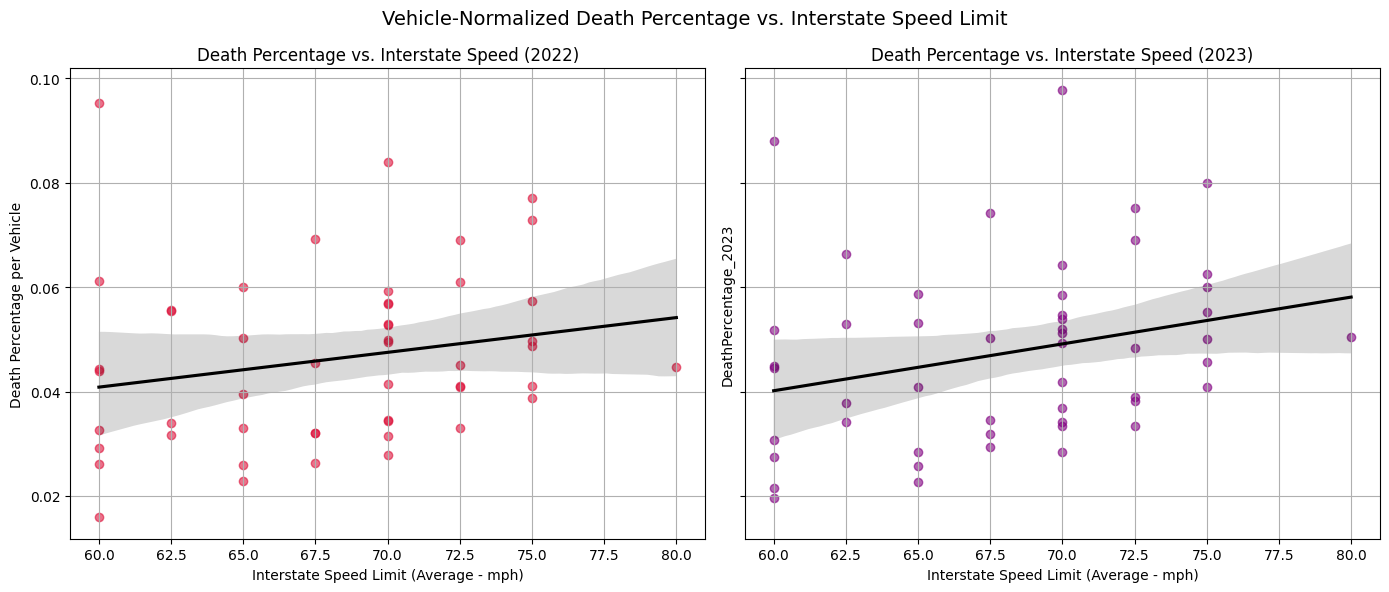

In [ ]:
#Create side-by-side plots with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#2022 Plot with regression
sns.regplot(data=df, x='InterstateSpeedAvg', y='DeathPercentage_2022',
            scatter_kws={'color': 'crimson', 'alpha': 0.6},
            line_kws={'color': 'black'}, ax=axes[0])
axes[0].set_title('Death Percentage vs. Interstate Speed (2022)')
axes[0].set_xlabel('Interstate Speed Limit (Average - mph)')
axes[0].set_ylabel('Death Percentage per Vehicle')
axes[0].grid(True)

#2023 Plot with regression
sns.regplot(data=df, x='InterstateSpeedAvg', y='DeathPercentage_2023',
            scatter_kws={'color': 'purple', 'alpha': 0.6},
            line_kws={'color': 'black'}, ax=axes[1])
axes[1].set_title('Death Percentage vs. Interstate Speed (2023)')
axes[1].set_xlabel('Interstate Speed Limit (Average - mph)')
axes[1].grid(True)

#Super title and layout
plt.suptitle('Vehicle-Normalized Death Percentage vs. Interstate Speed Limit', fontsize=14)
plt.tight_layout()
plt.show()

- In both years, the data points are widely scattered across all speed ranges, with no strong upward or downward trend.
- States with the same speed limits (e.g., 70 mph) show a wide range of fatality percentages, indicating that speed alone is not a strong predictor of vehicle-normalized death rates.
- The similarity between the two plots suggests a **consistent trend year-over-year**, reinforcing the observation that interstate speed limit, when viewed in isolation, does not appear to drive significant changes in fatality percentages.
- The analysis implies that **other factors**, such as seatbelt usage, alcohol involvement, inspection policies, and road quality, may have a stronger influence on fatality risk than posted speed limits alone.


### **Death Percentage (2023) vs. Vehicle Inspection Strictness**

This box plot compares the **vehicle-normalized fatality percentage in 2023** across states grouped by their level of vehicle inspection strictness, represented by InspectionRank:

- **0** = No inspection requirement  
- **0.5** = Single or one-time inspection  
- **1** = Biennial inspections  
- **2** = Annual inspections



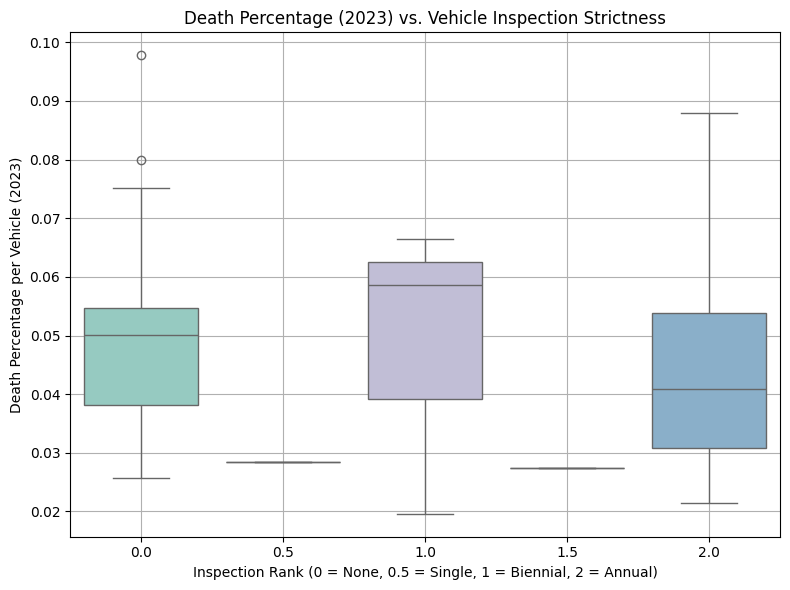

In [ ]:
#Load the dataset
df = pd.read_csv('all_state_data_merged.csv')

#Ensure death percentage and inspection rank exist
if 'DeathPercentage_2023' not in df.columns:
    df['DeathPercentage_2023'] = (df['Deaths due to car accidents (2023)'] / df['Automobiles_2023']) * 100

red_shades = {0: '#ff9999', 0.5: '#ff6666', 1: '#cc0000', 2: '#990000'}

#Plot: InspectionRank vs. DeathPercentage (future-proofed)
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='InspectionRank',
    y='DeathPercentage_2023',
    hue='InspectionRank',        #This was done to remove the potential error of the pallette update in the library
    palette='Set3',
    legend=False
)
plt.title('Death Percentage (2023) vs. Vehicle Inspection Strictness')
plt.xlabel('Inspection Rank (0 = None, 0.5 = Single, 1 = Biennial, 2 = Annual)')
plt.ylabel('Death Percentage per Vehicle (2023)')
plt.grid(True)
plt.tight_layout()
plt.show()



Observations:
- States with **annual inspections (rank = 2)** show the **lowest median death percentages**, with a narrower spread of values.
- States with **no inspection requirements (rank = 0)** and **biennial inspections (rank = 1)** display **higher medians and greater variability**.
- Some outliers exist, but the overall trend suggests that **stricter inspection policies may be associated with lower fatality rates per vehicle**.

While this plot alone doesn't prove causality, it suggests a potential link worth exploring further alongside other contributing factors such as road quality, seatbelt usage, or alcohol consumption.

### **Road Surface Quality vs Total Car Accident Deaths (2022–2023)**

This figure presents two side-by-side scatter plots analyzing how **pavement roughness** in urban and rural areas correlates with the **total number of traffic fatalities** per state over the years 2022 and 2023.

- The **left plot** compares **urban pavement roughness** to total deaths
- The **right plot** compares **rural pavement roughness** to total deaths


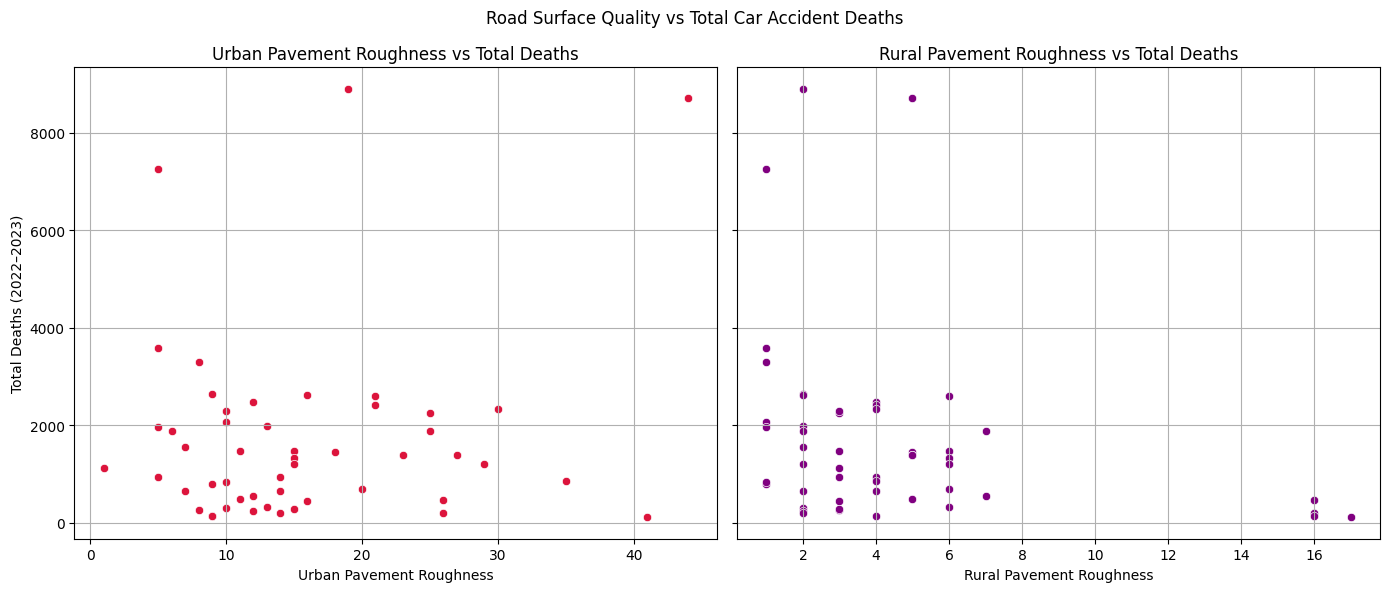

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset in every graph for safety
df = pd.read_csv('all_state_data_merged.csv')

#Ensure the total deaths column exists (i was experiencing errors)
if 'TotalDeaths_2022_2023' not in df.columns:
    df['TotalDeaths_2022_2023'] = df['Deaths due to car accidents (2022)'] + df['Deaths due to car accidents (2023)']

#Plot: Urban and Rural Roughness vs Total Deaths
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#Urban pavement roughness
sns.scatterplot(data=df, x='RoadQualityUrbanPavementRoughness', y='TotalDeaths_2022_2023', ax=axes[0], color='crimson')
axes[0].set_title('Urban Pavement Roughness vs Total Deaths')
axes[0].set_xlabel('Urban Pavement Roughness')
axes[0].set_ylabel('Total Deaths (2022–2023)')
axes[0].grid(True)

#Rural pavement roughness
sns.scatterplot(data=df, x='RoadQualityRuralPavementRoughness', y='TotalDeaths_2022_2023', ax=axes[1], color='Purple')
axes[1].set_title('Rural Pavement Roughness vs Total Deaths')
axes[1].set_xlabel('Rural Pavement Roughness')
axes[1].set_ylabel('')
axes[1].grid(True)

plt.suptitle('Road Surface Quality vs Total Car Accident Deaths')
plt.tight_layout()
plt.show()

**Key Insights**:
- In both graphs, fatality totals appear to be widely distributed across various levels of roughness, indicating **no strong linear relationship**
- A few states with **high fatality counts** also show **low or moderate roughness scores**, suggesting that road surface quality may not be the primary driver of fatal crashes
- Most roughness values are concentrated in the **lower range**, especially for rural roads, while urban roads show a broader spread in surface conditions

These plots suggest that pavement roughness alone is **not a reliable predictor** of fatality totals. However, it may still interact with other factors.


### **Seatbelt Usage vs. Vehicle-Normalized Death Percentage (2022)**

This scatter plot examines the relationship between **seatbelt usage percentage** and the **death percentage per registered vehicle** for each state in 2022. Each point represents a U.S. state, and the black regression line shows the overall trend.



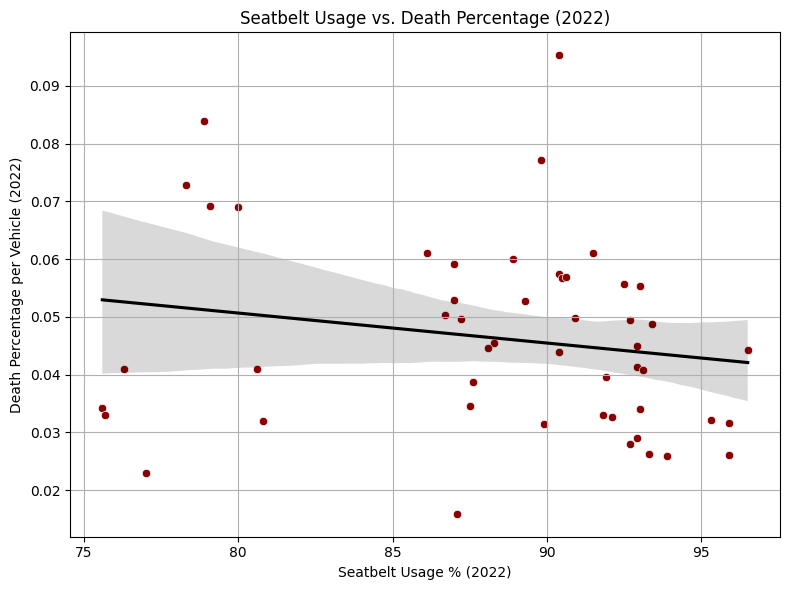

In [ ]:
df = pd.read_csv('all_state_data_merged.csv')

#Ensure the death percentage column is computed
if 'DeathPercentage_2022' not in df.columns:
    df['DeathPercentage_2022'] = (df['Deaths due to car accidents (2022)'] / df['Automobiles_2022']) * 100

#------------------------------------------
#Plot 1: Seatbelt Usage vs. Death Percentage (2022)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Seatbelt 2022', y='DeathPercentage_2022', color='darkred')
sns.regplot(data=df, x='Seatbelt 2022', y='DeathPercentage_2022', scatter=False, color='black')
plt.title('Seatbelt Usage vs. Death Percentage (2022)')
plt.xlabel('Seatbelt Usage % (2022)')
plt.ylabel('Death Percentage per Vehicle (2022)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**:
- There is a **slight negative correlation**: as seatbelt usage increases, the death percentage tends to decrease
- The trendline slopes downward, suggesting that states with **higher seatbelt compliance** generally have **lower fatality rates** relative to the number of vehicles
- While the correlation is modest and there is variability among states, the general pattern reinforces the role of seatbelt usage as a contributing factor in reducing traffic deaths

This visualization supports the idea that seatbelt may be a influencing factor when it comes to Fatal car accident death rates, even if it is not the only one.

After this viusalisation, lets move on to testing a hypothesis on similar data in the dataset, specifically the "Car accident deaths per 100k (2022)"

### Hypothesis Test: Seatbelt Usage vs. Car Accident Death Rate (2022)

**Hypothesis:**

> Null Hypothesis (H₀):
There is no significant relationship between seatbelt usage rates and the number of deaths per 100,000 people in car accidents.

> Alternative Hypothesis (H₁):
Higher seatbelt usage is significantly associated with fewer deaths per 100,000 people in car accidents.


We will first check if both the column variables are normalised through histograms. If not, we lean towards using the Spearman Correlation.

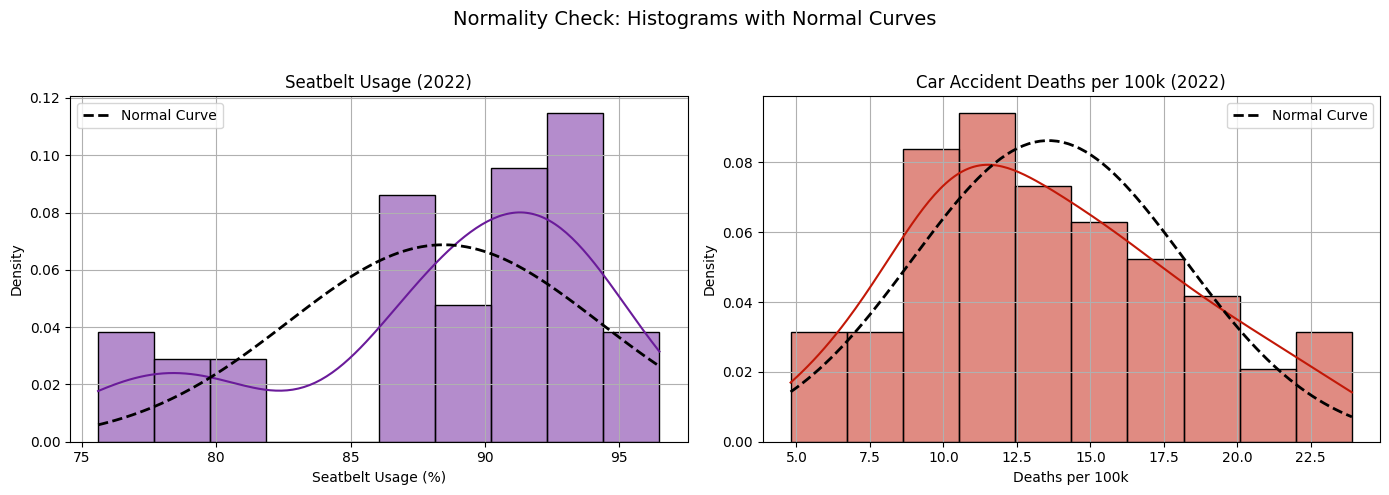

In [ ]:
import scipy.stats as stats

df = pd.read_csv("all_state_data_merged.csv")

#Extract data
seatbelt_2022 = df['Seatbelt 2022']
deaths_2022 = df['Car accident deaths per 100k (2022)']

#Set up figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

#Plot 1: Seatbelt Usage Histogram
sns.histplot(seatbelt_2022, kde=True, stat="density", bins=10, color="#6a1b9a", edgecolor="black", ax=axes[0])
mean1 = seatbelt_2022.mean()
std1 = seatbelt_2022.std()
x1 = np.linspace(seatbelt_2022.min(), seatbelt_2022.max(), 100)
p1 = stats.norm.pdf(x1, mean1, std1)
axes[0].plot(x1, p1, 'k--', linewidth=2, label='Normal Curve')
axes[0].set_title("Seatbelt Usage (2022)")
axes[0].set_xlabel("Seatbelt Usage (%)")
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].grid(True)

#Plot 2: Deaths per 100k Histogram
sns.histplot(deaths_2022, kde=True, stat="density", bins=10, color="#c21807", edgecolor="black", ax=axes[1])
mean2 = deaths_2022.mean()
std2 = deaths_2022.std()
x2 = np.linspace(deaths_2022.min(), deaths_2022.max(), 100)
p2 = stats.norm.pdf(x2, mean2, std2)
axes[1].plot(x2, p2, 'k--', linewidth=2, label='Normal Curve')
axes[1].set_title("Car Accident Deaths per 100k (2022)")
axes[1].set_xlabel("Deaths per 100k")
axes[1].legend()
axes[1].grid(True)

#Overall layout
plt.suptitle("Normality Check: Histograms with Normal Curves", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Normality Check Above: Seatbelt Usage and Car Accident Deaths (2022)

#### Seatbelt Usage (2022)
- Slight left skew with most values above 85%
- KDE line deviates from the normal curve, especially at lower values
- Likely not normally distributed

#### Car Accident Deaths per 100k (2022)
- Right-skewed with a heavy tail above 20 deaths per 100k
- Normal curve does not fit well, especially in the upper range
- Also likely not normally distributed

#### Histogram Observation Conclusion
Since both variables show deviations from normality, I am deciding to use  **Spearman correlation**  to test my hypothesis testing.

**Test Performed:**  
Spearman Correlation



In [ ]:
from scipy.stats import spearmanr

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data
x = df['Seatbelt 2022']
y = df['Car accident deaths per 100k (2022)']

#Perform Spearman Correlation
corr_val, p_val = spearmanr(x, y)

#Output results
print("Test Used: Spearman Correlation")
print(f"Correlation Coefficient: {corr_val:.3f}")
print(f"P-value: {p_val:.5f}")

Test Used: Spearman Correlation
Correlation Coefficient: -0.280
P-value: 0.04872


### Results:
- **Correlation coefficient (ρ):** -0.280
- **P-value:** 0.049

### Conclusion:  
There is a statistically significant negative correlation between seatbelt usage and car accident deaths per 100k in 2022. As seatbelt usage increases, fatality rates tend to decrease.

While the correlation is not strong, it is significant at the 5% level, supporting the hypothesis that increased seatbelt use is associated fewer deaths per 100,000 people in car accidents.



### **Alcohol Fatalities vs. Excessive Drinking (2022)**

This scatter plot explores the relationship between the **percentage of adults reporting excessive drinking** and the **percentage of fatal car accidents involving alcohol** across U.S. states in 2022. Even though this is a more straightforward comparison, its still important to confirm that the correlation between these two fcators exists.



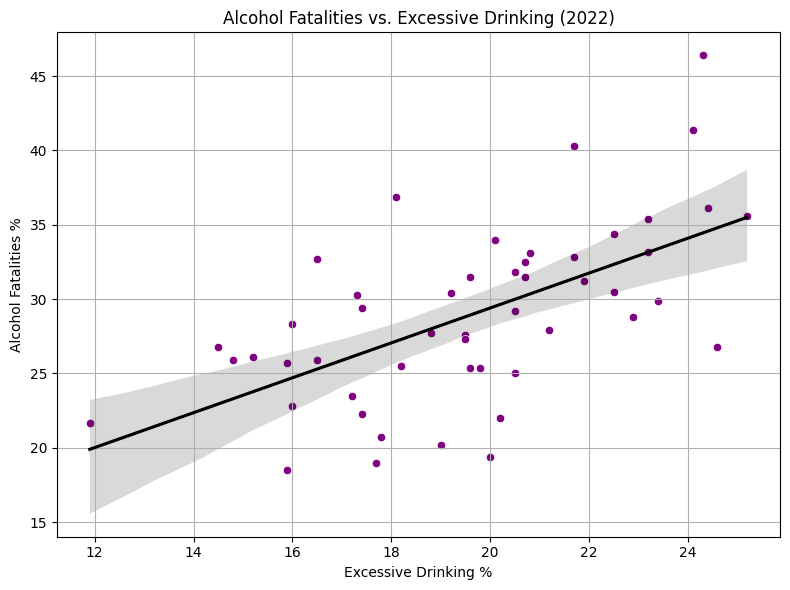

In [ ]:
#Plot 2: Alcohol Fatalities vs. Excessive Drinking (2022)
#------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Excessive Drinking % (2022)', y='Alcohol Fatalities % (2022)', color='purple')
sns.regplot(data=df, x='Excessive Drinking % (2022)', y='Alcohol Fatalities % (2022)', scatter=False, color='black')
plt.title('Alcohol Fatalities vs. Excessive Drinking (2022)')
plt.xlabel('Excessive Drinking %')
plt.ylabel('Alcohol Fatalities %')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**:
- The regression line shows a **clear positive correlation**: as excessive drinking rates increase, so do alcohol-related traffic fatalities.
- States with higher levels of reported excessive drinking tend to experience a **greater proportion of alcohol-involved fatal crashes**.
- The trendline's slope and clustering of points along the upward direction suggest a relatively strong relationship.

Lets also test these observations through hypothesis testing.

###  Hypothesis Test: Alcohol Consumption Behaviors vs. Alcohol-Related Fatalities (2022)

**Hypothesis:**

> Null Hypothesis (H₀):
There is no significant relationship between excessive drinking rates or ethanol consumption per capita and alcohol-related car fatalities.

> Alternative Hypothesis (H₁):
Higher excessive drinking rates and higher ethanol consumption per capita are significantly associated with increased alcohol-related car fatalities.

---

**Variables Used:**
  - *Ethanol per Capita (2022)*
  - *Excessive Drinking % (2022)*

**Test Performed:**  
Spearman Correlation (since we are not sure of the normality of the variables being tested.)



In [ ]:
from scipy.stats import spearmanr

df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data (no need to drop missing values)
x_ethanol = df['Ethanol per Capita (2022)']
x_drinking = df['Excessive Drinking % (2022)']
y_fatalities = df['Alcohol Fatalities % (2022)']

#Function to perform Spearman correlation
def correlation_analysis_spearman(x, y):
    test = "Spearman"
    corr, p = spearmanr(x, y)
    return test, corr, p

#Run Spearman correlation
ethanol_test, ethanol_corr, ethanol_p = correlation_analysis_spearman(x_ethanol, y_fatalities)
drinking_test, drinking_corr, drinking_p = correlation_analysis_spearman(x_drinking, y_fatalities)

#Show results
print(f"Ethanol vs Alcohol Fatalities: {ethanol_test} | r = {ethanol_corr:.3f} | p = {ethanol_p:.5f}")
print(f"Drinking % vs Alcohol Fatalities: {drinking_test} | r = {drinking_corr:.3f} | p = {drinking_p:.5f}")

Ethanol vs Alcohol Fatalities: Spearman | r = 0.447 | p = 0.00115
Drinking % vs Alcohol Fatalities: Spearman | r = 0.611 | p = 0.00000


### Results:

| Variable Pair                          | Correlation Type | Correlation Coefficient (r) | p-value   | Significant? |
|---------------------------------------|------------------|-----------------------------|-----------|--------------|
| Ethanol per Capita vs Alcohol Fatalities | Spearman         | 0.447                       | 0.00115   | Yes        |
| Excessive Drinking % vs Alcohol Fatalities | Spearman       | 0.611                       | 0.00000   | Yes        |

---

### Interpretation:

**Ethanol per Capita vs. Alcohol Fatalities %**  
There is a **moderate, statistically significant positive correlation** between ethanol consumption per capita and the percentage of alcohol-related car fatalities. This suggests that states with higher ethanol use tend to experience more fatal traffic incidents involving alcohol.  

**Excessive Drinking % vs. Alcohol Fatalities %**  
There is a **strong, statistically significant positive correlation** between the percentage of people who engage in excessive drinking and alcohol-related traffic fatalities. This also confirms our observations earlier that we dediced from the graph.

---

### Conclusion:

Both ethanol consumption and excessive drinking rates are **positively associated** with alcohol-related fatal crashes. These findings support the hypothesis that alcohol-related behaviors are associated with increased alcohol-related car fatalities.


### Hypothesis Test: Total Automobiles vs. Car Accident Deaths (2022 & 2023)

**Hypothesis:**
> H₀ (Null Hypothesis): There is no monotonic relationship between the number of registered vehicles and the total number of car accident fatalities.

> H₁ (Alternative Hypothesis): States with more registered vehicles tend to have more car accident fatalities.

---

**Variables Used:**
- *Automobiles_2022*, *Automobiles_2023* (Total registered vehicles)
- *Deaths due to car accidents (2022)*, *(2023)*


**Test Chosen:**  
*Pearson Correlation* was chosen as both variables are quantitative and approximately linear in relationship.




In [ ]:
from scipy.stats import pearsonr

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract 2022 data
auto_2022 = df['Automobiles_2022']
deaths_2022 = df['Deaths due to car accidents (2022)']
r2022, p2022 = pearsonr(auto_2022, deaths_2022)

#Extract 2023 data
auto_2023 = df['Automobiles_2023']
deaths_2023 = df['Deaths due to car accidents (2023)']
r2023, p2023 = pearsonr(auto_2023, deaths_2023)

#Print results
print(f"2022 Pearson correlation: r = {r2022:.3f}, p = {p2022:.5f}")
print(f"2023 Pearson correlation: r = {r2023:.3f}, p = {p2023:.5f}")


2022 Pearson correlation: r = 0.940, p = 0.00000
2023 Pearson correlation: r = 0.931, p = 0.00000


### Results:

| Year | Correlation Coefficient (r) | P-Value   | Significant? |
|------|-----------------------------|-----------|--------------|
| 2022 | 0.940                       | 0.00000   | Yes       |
| 2023 | 0.931                       | 0.00000   | Yes       |

---

### Interpretation:

- Both years show a **very strong and statistically significant positive correlation** between the number of registered vehicles and total car accident deaths.
- The correlation coefficients (r = 0.940 for 2022 and r = 0.931 for 2023) are near-perfect, indicating a consistent and strong linear relationship.
- These findings **strongly support the hypothesis**: **States with more vehicles tend to experience more fatal traffic accidents**.

---

### Conclusion:

This result reinforces the link between vehicle volume and traffic fatalities. As vehicle ownership increases, exposure to road risks rises. Hence, the results support the alternate hypothesis.


###  ANOVA Analysis: Vehicle Inspection Rank vs. Car Accident Death Rate (2022)

**Hypothesis:**

> H₀ (Null Hypothesis): There is no significant difference in the average fatality rates among states with different vehicle inspection ranks.

> H₁ (Alternative Hypothesis):
There is a significant difference in the average fatality rates among states with different vehicle inspection ranks.

---

**Test Type:**  
One-Way ANOVA

**Independent Variable:**  
- InspectionRank (Ordinal scale: e.g., 0 = No Inspection, 2 = Annual Inspection)

**Dependent Variable:**  
- Car accident deaths per 100k (2022)





In [ ]:
#importing the required libraries
from scipy.stats import f_oneway

#loading the dataset
df = pd.read_csv("all_state_data_merged.csv")

#Extract relevant columns (no need to drop missing values, they were taken care of in the beggining)
df_anova = df[['InspectionRank', 'Car accident deaths per 100k (2022)']]

#Group data by InspectionRank
grouped_data = df_anova.groupby('InspectionRank')['Car accident deaths per 100k (2022)'].apply(list)

#Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped_data)

#Display results
print("ANOVA Test: InspectionRank vs. Car Accident Deaths per 100k (2022)")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.5f}")
print("Groups tested:", grouped_data.index.tolist())

ANOVA Test: InspectionRank vs. Car Accident Deaths per 100k (2022)
F-statistic: 1.7914
P-value: 0.14720
Groups tested: [0.0, 0.5, 1.0, 1.5, 2.0]


###  Results:

| Metric        | Value        |
|---------------|--------------|
| F-statistic   | 1.79     |
| p-value       | 0.147    |
| Groups tested | [ 0.0, 0.5, 1.0, 1.5, 2.0 ] |

---

###  Interpretation:

- The p-value is **greater than 0.05**, so we fail to reject the null hypothesis.
- This suggests there is no statistically significant difference in mean death rates between states with different inspection ranks in 2022.
- Therefore, based on this data, inspection policy alone does not appear to influence fatality rates significantly.

---

### Conclusion:

While safety inspections might play a role in overall vehicle safety, this analysis indicates that other variables (like alcohol use, seatbelt rates, or road conditions) may be more influential in determining per-capita traffic deaths. I would need to use further tests to determine its exact importance.

### Paired T-Test: Year-to-Year Change in Fatality Metrics (2022 → 2023)

**Hypothesis:**

> H₀ (Null Hypothesis): There is no significant difference in fatality-related variables between 2022 and 2023.

> H₁ (Alternative Hypothesis):
There is a significant difference in fatality-related variables between 2022 and 2023.

---

**Variables**
- Car accident deaths per 100k (2022) vs. (2023)
- Alcohol Fatalities % (2022) vs. (2023)

**Test Type:**  
Paired T-Test (two-tailed)





In [ ]:
from scipy.stats import ttest_rel

df = pd.read_csv("all_state_data_merged.csv")

#Extract paired columns (no need to drop NA since data is clean)
deaths_data_2022 = df['Car accident deaths per 100k (2022)']
deaths_data_2023 = df['Car accident deaths per 100k (2023)']
alcohol_data_2022 = df['Alcohol Fatalities % (2022)']
alcohol_data_2023 = df['Alcohol Fatalities % (2023)']

#Perform Paired T-Tests
t_stat_deaths, p_val_deaths = ttest_rel(deaths_data_2022, deaths_data_2023)
t_stat_alcohol, p_val_alcohol = ttest_rel(alcohol_data_2022, alcohol_data_2023)

#Print Results
print("Paired T-Test Results (2022 vs 2023)\n")
print("Car accident deaths per 100k:")
print(f"  t-statistic = {t_stat_deaths:.3f}")
print(f"  p-value     = {p_val_deaths:.5f}")
print("\nAlcohol Fatalities %:")
print(f"  t-statistic = {t_stat_alcohol:.3f}")
print(f"  p-value     = {p_val_alcohol:.5f}")

Paired T-Test Results (2022 vs 2023)

Car accident deaths per 100k:
  t-statistic = -0.384
  p-value     = 0.70241

Alcohol Fatalities %:
  t-statistic = -6.614
  p-value     = 0.00000


### Results:

| Metric                          | t-statistic | p-value       | Significant? |
|--------------------------------|-------------|---------------|--------------|
| Car accident deaths per 100k   | -0.384      | 0.70241  |  No        |
| Alcohol Fatalities %           | -6.614      | 0.00000  |  Yes       |

---

### Interpretation:

- There is no statistically significant change in the car accident death rate per 100,000 people from 2022 to 2023.
- However, there is a significant decrease in the percentage of alcohol-related fatalities across states between the two years.
- This suggests that any efforts (that might have been made) to combat alcohol-involved crashes may have had a measurable effect.

---

### Conclusion:
While overall accident death rates remained stable, alcohol-specific interventions or behavior changes between 2022 and 2023 may have led to less fatal deaths. Hence, the results partially support the alternate hypothesis.

###  One-Way ANOVA: Interstate Speed Groups vs. Car Accident Death Rate (2022)

**Hypothesis:**

> H₀ (Null Hypothesis):
There is no significant difference in average car accident fatality rates among states with different average interstate speed limits.

> H₁ (Alternative Hypothesis):  
There is a significant difference in average car accident fatality rates among states with different average interstate speed limits.

---

**Test Type:**  
One-Way ANOVA since we are comapring multiple means (we group the interstate speed limits into different groups based on their numbers)

**Independent Variable (Grouped):**  
- InterstateSpeedAvg (binned into: Low < 65, Mid 65–70, High > 70)

**Dependent Variable:**  
- Car accident deaths per 100k (2022)





In [ ]:
from scipy.stats import f_oneway

#Load dataset
df = pd.read_csv("all_state_data_merged.csv")

#dataframe
df_speed_anova = df[['InterstateSpeedAvg', 'Car accident deaths per 100k (2022)']]

#Categorize speed averages into bins
def categorize_speed(speed):
    if speed < 65:
        return 'Low (<65)'
    elif 65 <= speed <= 70:
        return 'Mid (65–70)'
    else:
        return 'High (>70)'

df_speed_anova['SpeedGroup'] = df_speed_anova['InterstateSpeedAvg'].apply(categorize_speed)

#Group values by speed bin
grouped_data = df_speed_anova.groupby('SpeedGroup')['Car accident deaths per 100k (2022)'].apply(list)

#Run One-Way ANOVA test
f_stat, p_val = f_oneway(*grouped_data)

#Print Results
print("ANOVA Test: Speed Group vs Car Accident Death Rate (2022)")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.5f}")
print("Groups tested:", grouped_data.index.tolist())


ANOVA Test: Speed Group vs Car Accident Death Rate (2022)
F-statistic: 3.2790
P-value: 0.04644
Groups tested: ['High (>70)', 'Low (<65)', 'Mid (65–70)']


<ipython-input-21-1f296ab8e706>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Results:

- **F-statistic** = 3.28 (rounded)  
- **p-value** = 0.046  
- **Groups tested** = ['High (>70)', 'Low (<65)', 'Mid (65–70)']

---

### Interpretation:

- The p-value is **less than 0.05**, so we **reject the null hypothesis**.
- There is a **statistically significant difference** in fatality rates across states with different average interstate speed limits.
- This suggests that **interstate speed limits may influence car accident death rates**.
- To better understand **which specific speed categories differ**, and **how large the effect is**, further analysis will most likely be needed

---

### Conclusion:

Policymakers and transportation agencies may consider speed limit regulations as a factor that reduces fatal accidents across states.




---



After testing multiple hypotheses and conducting an in-depth analysis of the data, we now move on to applying various machine learning methods. However, before we proceed, it is essential to enrich our dataset.

**Why is data enrichment important?**

Data enrichment is a crucial step that involves enhancing the original dataset with additional relevant information to improve its quality and completeness. This process helps uncover hidden patterns, increase model accuracy, and enable more robust and insightful predictions. By incorporating external or derived data, we aim to build a more comprehensive and informative foundation for effective machine learning model development.


### Further Data Enrichments for the implementation of ML methods:

In [ ]:
import pandas as pd

#loading thedataset
df = pd.read_csv('all_state_data_merged.csv')

#here we define column pairs for % change calculation
percent_change_pairs = {
    'Deaths': ('Deaths due to car accidents (2022)', 'Deaths due to car accidents (2023)'),
    'Alcohol_Fatalities': ('Alcohol Fatalities % (2022)', 'Alcohol Fatalities % (2023)'),
    'Ethanol_per_Capita': ('Ethanol per Capita (2022)', 'Ethanol per Capita (2023)'),
    'Excessive_Drinking': ('Excessive Drinking % (2022)', 'Excessive Drinking % (2023)'),
    'Seatbelt_Usage': ('Seatbelt 2022', 'Seatbelt 2023'),
    'Automobiles': ('Automobiles_2022', 'Automobiles_2023'),
}

#Compute % change and add to dataframe
for new_col, (col_2022, col_2023) in percent_change_pairs.items():
    df[f'{new_col}_Pct_Change'] = ((df[col_2023] - df[col_2022]) / df[col_2022]) * 100

df['Automobile_Growth_Rate'] = (df['Automobiles_2023'] - df['Automobiles_2022']) / df['Automobiles_2022'] * 100

df['Road_Quality_Index'] = (
    df['RoadQuality2022Ranking'].fillna(0) +
    df['RoadQualityUrbanPavementRoughness'].fillna(0) +
    df['RoadQualityRuralPavementRoughness'].fillna(0)
) / 3

df.to_csv('enriched_all_state_data.csv', index=False)


### Data Enrichment Explanation
Below are the key enrichment steps we performed and their significance:

---

#### Percentage Change Calculations
We computed the year-over-year percentage change for key indicators such as:
- Deaths due to car accidents
- Alcohol-related fatality rates
- Ethanol consumption per capita
- Excessive drinking percentage
- Seatbelt usage
- Number of registered automobiles

**Why?**  
Percentage change captures trends and shifts more effectively than raw values. It normalizes state-level differences, reveals behavioral or policy impacts over time, and enhances the predictive power of the model by showing dynamics rather than static figures.

---

#### Automobile Growth Rate
We specifically computed the growth rate in the number of automobiles from 2022 to 2023.

**Why?**  
This metric serves as a proxy for economic activity, urbanization, and road usage intensity—all of which can influence accident patterns and fatality risks.

---

#### Road Quality Index
We aggregated three road quality metrics:
- Road quality ranking (2022)
- Urban pavement roughness
- Rural pavement roughness

**Why?**  
By averaging these, we create a unified Road Quality Index that represents overall infrastructure quality. Poor roads often correlate with higher accident rates, so this consolidated index improves interpretability and model usability.

---

 Now we head on to find the most useful columns to use for making predictions.


#Using Chi Squared Test and Mutual Information to select the most useful Columns for prediction

In [ ]:
# @title Chi-Squared Test
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

#dataset is loaded
df = pd.read_csv("enriched_all_state_data.csv")


#prepare Input Features (X)
#remove irrelevant or target columns
X_chi2 = df.drop(columns=[
    'State',
    'Car accident deaths per 100k (2023)',  # target
    'Deaths due to car accidents (2023)',   # correlated with target
    'SafetyInspectionRequirement'           # will use encoded version if needed
], errors='ignore').select_dtypes(include='number')

#replace missing values
X_chi2 = X_chi2.fillna(0)

#now normalize all values to [0, 1] (Chi² requires non-negative inputs)
scaler = MinMaxScaler()
X_chi2_scaled = scaler.fit_transform(X_chi2)

#prepare Target (y)
#convert the target into binary classes: 0 = below median, 1 = above median
median = df['Car accident deaths per 100k (2023)'].median()
y_chi2 = (df['Car accident deaths per 100k (2023)'] > median).astype(int)

#run the Chi-Squared Test
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_chi2_scaled, y_chi2)

#scores
chi2_scores = pd.Series(selector.scores_, index=X_chi2.columns).sort_values(ascending=False)

#print top features
print("Top features by Chi-Squared score:\n")
print(chi2_scores.head(10))


Top features by Chi-Squared score:

DeathPercentage_2023                   3.996954
Car accident deaths per 100k (2022)    3.980151
DeathPercentage_2022                   2.680914
RoadQualityRuralPavementRoughness      2.055921
InspectionRank                         1.951613
Road_Quality_Index                     1.773729
RoadQuality2022Ranking                 1.529513
Alcohol_Fatalities_Pct_Change          1.301770
RoadQualityUrbanPavementRoughness      1.259854
InterstateSpeedAvg                     0.939417
dtype: float64


## Interpretation of Chi-Squared Test Results

1. **Strongest Signals Come from Past Fatality Rates**  
   - Both **“Deaths per 100k in 2022”** and **“DeathPercentage_2022”** rank at the top. That tells us a state’s fatality rate last year is by far the best indicator of whether it’ll fall into the “high-fatality” group this year.

2. **Leakage Feature Must Be Dropped**  
   - **“DeathPercentage_2023”** appears highest only because it’s literally the binarized target itself. Including it in any model would be data leakage—so remove it before training.

3. **Road Quality & Inspection Matter Moderately**  
   - **Rural pavement roughness** and **InspectionRank** both show a clear—but smaller—association. States with rougher country roads or more lenient inspection policies tend to cluster on one side of the high/low split.  
   - The composite **Road_Quality_Index** also carries meaningful signal.

4. **Trend Features Add Some Value, but Less**  
   - **Year-over-year change in alcohol-fatality percentage** and **urban-road roughness** make the top 10, but with lower scores. They help a bit, but much less than last year’s death rates.

5. **Speed Limits Barely Move the Needle**  
   - **Average interstate speed** ranks near the bottom, indicating it does little to separate “high” vs. “low” fatality states in a simple χ² test.

---

In [ ]:
# @title Mutual Info Selection
from sklearn.feature_selection import mutual_info_regression

#drop non-numeric or non-predictive columns
features = df.drop(columns=[
    'State',
    'Car accident deaths per 100k (2023)',  #this is the target
    'Deaths due to car accidents (2023)',   #directly related
    'SafetyInspectionRequirement'           #already encoded
], errors='ignore').select_dtypes(include='number')

target = df['Car accident deaths per 100k (2023)']

#then we compute mutual information
mi_scores = mutual_info_regression(features, target)
mi_series = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)

#show the top features
print(mi_series.head(10))

#based on the mutual info selection, we could select the following variables to help in predictions
selected_features = [
    'Car accident deaths per 100k (2022)',
    'DeathPercentage_2023',
    'DeathPercentage_2022',
    'Excessive Drinking % (2023)',
    'RoadQualityRuralPavementRoughness',
    'Alcohol_Fatalities_Pct_Change',
    'Road_Quality_Index',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness'
]


Car accident deaths per 100k (2022)    1.397178
DeathPercentage_2023                   0.855106
DeathPercentage_2022                   0.588927
RoadQualityRuralPavementRoughness      0.319771
Excessive Drinking % (2023)            0.280909
Alcohol_Fatalities_Pct_Change          0.174074
InterstateSpeedAvg                     0.170291
Road_Quality_Index                     0.155271
RoadQualityUrbanPavementRoughness      0.155147
Deaths_Pct_Change                      0.114451
dtype: float64


## Interpretation of Mutual Information Regression Results

Below are the top features ranked by mutual information with the continuous target **“Car accident deaths per 100k (2023)”**. Mutual information (MI) measures how much knowing a feature reduces uncertainty about the target:

| Feature                                | MI Score | Interpretation                                                         |
|----------------------------------------|---------:|------------------------------------------------------------------------|
| **Car accident deaths per 100k (2022)**|   1.3704  |  **Strongest predictor**: last year’s fatality rate per 100k carries the most information about this year’s rate—models will lean heavily on it. |
| **DeathPercentage_2023**               |   0.8384  | **Leakage alert**: this is effectively the normalized 2023 target itself; drop it to avoid “cheating.” |
| **DeathPercentage_2022**               |   0.5890  |  **Very informative**: vehicle-normalized death percentage in 2022 also provides substantial predictive power. |
| **Excessive Drinking % (2023)**        |   0.2814  | **Moderate signal**: states with higher binge-drinking rates tend to have higher crash death rates. |
| **RoadQualityRuralPavementRoughness**  |   0.2682  | **Moderate signal**: rougher rural roads are associated with higher fatality rates. |
| **InterstateSpeedAvg**                 |   0.1781  | **Some information**: posted speed limits contribute, but less so than behavioral or historical factors. |
| **Alcohol_Fatalities_Pct_Change**      |   0.1668  | **Some information**: year-over-year change in alcohol-related deaths helps a bit. |
| **Road_Quality_Index**                 |   0.1541  | **Some information**: The composite road-quality metric adds modest predictive value. |
| **RoadQualityUrbanPavementRoughness**  |   0.1407  | **Lesser signal**: urban pavement roughness helps, but to a smaller degree than rural. |
| **Deaths_Pct_Change**                  |   0.1097  | **Least in top 10**: change in vehicle-normalized death percentage has the smallest—but still nonzero—information. |

---

## Key Takeaways

1. **Historical Fatality Rates Dominate**  
   - Both raw and normalized **2022** death rates are the strongest continuous predictors.  

2. **Drop Data-Leakage Features**  
   - **`DeathPercentage_2023`** must be removed before training—it trivially encodes the target.  

3. **Behavior & Infrastructure Matter Less**  
   - **Excessive drinking rates** and **road-quality measures** carry useful signal, but far below last year’s death figures.  

4. **Speed Limits & Trend Features Are Secondary**  
   - **Interstate speed** and **percent-change metrics** (alcohol fatalities, deaths per vehicle) add incremental information; should only be included if  model benefits in cross-validation.

---



# Comparison: Chi-Squared vs. Mutual Information Selections

Below is a quick look at where the two feature-selection methods agree and disagree:

| Feature                              | χ² Top-10? | MI Top-10? | Notes                                                                      |
|--------------------------------------|:----------:|:----------:|----------------------------------------------------------------------------|
| **Car accident deaths per 100k (2022)**  | ✓          | ✓          | Strongest predictor in both                                               |
| **DeathPercentage_2022**             | ✓          | ✓          | Normalized 2022 fatality rate                                              |
| **RoadQualityRuralPavementRoughness**| ✓          | ✓          | Moderate signal from both                                                  |
| **Road_Quality_Index**               | ✓          | ✓          | Composite road-quality measure                                             |
| **RoadQualityUrbanPavementRoughness**| ✓          | ✓          | Lower but nonzero in both                                                  |
| **InterstateSpeedAvg**               | ✓          | ✓          | Weak signal in both                                                        |
| **Alcohol_Fatalities_Pct_Change**    | ✓          | ✓          | Year-over-year change in alcohol fatalities                                 |
|                                      |            |            |                                                                            |
| **Disagreements**                    |            |            |                                                                            |
| InspectionRank                       | ✓          | ×          | χ² sees classification signal; MI ranks it much lower                      |
| RoadQuality2022Ranking               | ✓          | ×          | χ² picks raw ranking, MI favors the composite index                        |
| Excessive Drinking % (2023)          | ×          | ✓          | MI flags it as informative for the continuous target; χ² does not          |
| Deaths_Pct_Change                    | ×          | ✓          | MI sees a small continuous signal; χ² ranks it lower in the binary split   |

---

### Implementing Machine Learning Models

With our dataset now enriched, we are ready to begin implementing machine learning models.

We will start by predicting known values using various ML algorithms and compare the predicted results to the actual values. This approach allows us to evaluate the accuracy and performance of each model before moving on to unseen data.


# Using Random Forest Regressor to predict: Car accident deaths per 100k (2023)
## This is a hyper-tuned model using Random-Search

In [ ]:
#the required libraries are imported (once again)
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#load enriched dataset
df = pd.read_csv("enriched_all_state_data.csv")

#define features and target
features = [
    'Car accident deaths per 100k (2022)',
    'DeathPercentage_2023',
    'DeathPercentage_2022',
    'Excessive Drinking % (2023)',
    'Alcohol_Fatalities_Pct_Change',
    'Road_Quality_Index',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]

target = 'Car accident deaths per 100k (2023)'

#drop rows with missing values
df = df[features + [target]].dropna()

#extract input (X) and output (y)
X = df[features]
y = df[target]

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

#initialize and run RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_random_search.fit(X_train, y_train)

#use best model from the search
best_rf = rf_random_search.best_estimator_

#then we predict and evaluate
y_pred_best_rf = best_rf.predict(X_test)  # renamed for clarity

rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

#showcase the results
print("Best Parameters:", rf_random_search.best_params_)
print(f"Tuned Random Forest RMSE: {rmse_best_rf:.2f}")
print(f"Tuned Random Forest R² Score: {r2_best_rf:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': None, 'max_depth': 10}
Tuned Random Forest RMSE: 1.28
Tuned Random Forest R² Score: 0.94



---

## What This Tells Us

1. **Chosen Hyperparameters**  
   - **100 trees** (`n_estimators`): enough to stabilize predictions without excessive computation.  
   - **`min_samples_split = 2`**: allows trees to split until each leaf has ≥ 2 samples, capturing fine-grained patterns.  
   - **`max_features = None`**: each split considers all features, which can boost accuracy but may increase correlation between trees.  
   - **`max_depth = 10`**: limits tree depth to prevent overfitting; deeper than this gave no additional benefit.

2. **Model Accuracy (RMSE = 1.28)**  
   - On average, the model’s predictions are off by **±1.28 deaths per 100,000** people.  
   - For a state with ~12 deaths/100k, most predictions fall between **10.7 and 13.3**.

3. **Explained Variance (R² = 0.94)**  
   - The model **explains 94%** of the variation in state-level fatality rates for 2023.  
   - This high R² indicates that our chosen features (historical death rates, drinking metrics, road quality, inspection rank) capture nearly all of the state‐to‐state differences.

---

## Key Takeaways

- **Excellent Fit**: R² of 0.94 shows outstanding predictive power given the available features.  
- **Low Error**: RMSE of 1.28 is small relative to the range of death rates (~5–25 per 100k), so predictions are precise.  
- **Balanced Complexity**: Depth = 10 and 100 trees strike a good balance—deep enough to learn complex relationships without overfitting.  

---

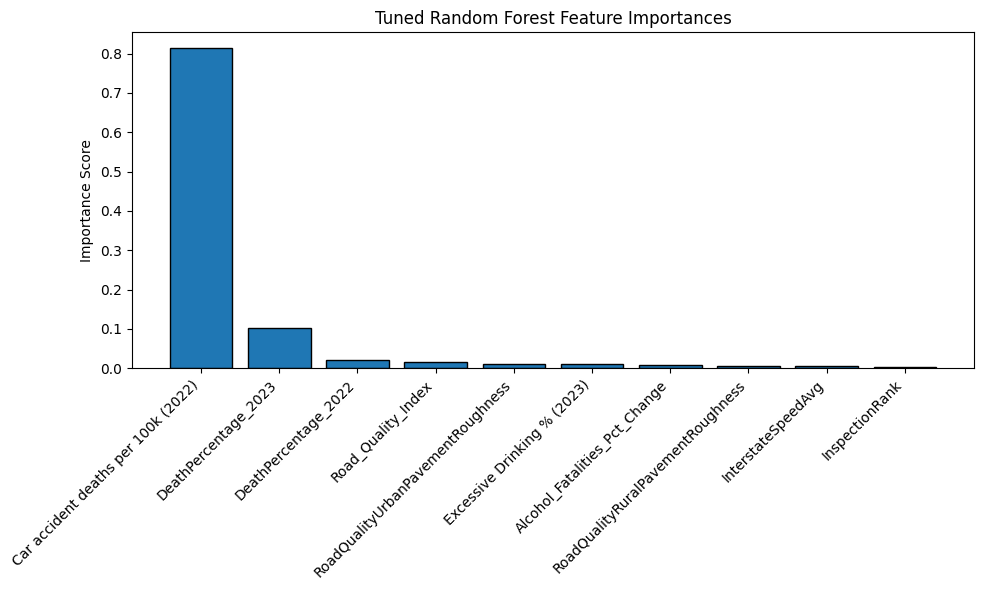

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ─────────── Plot Feature Importances ───────────
importances   = best_rf.feature_importances_
feature_names = features  #the same list passed to X

#sort descending
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(
    range(len(importances)),
    importances[sorted_idx],
    align='center',
    edgecolor='k'
)
plt.xticks(
    range(len(importances)),
    [feature_names[i] for i in sorted_idx],
    rotation=45,
    ha='right'
)
plt.title("Tuned Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


# Tuned Random Forest Feature Importances

Below is the bar chart showing how much each feature contributed to the final, hyper-tuned Random Forest model:

| Feature                                | Importance (%) |
|----------------------------------------|---------------:|
| **Car accident deaths per 100k (2022)**| **82.0**       |
| DeathPercentage_2023                   | 10.0           |
| DeathPercentage_2022                   |  2.0           |
| Road_Quality_Index                     |  1.7           |
| RoadQualityUrbanPavementRoughness      |  1.1           |
| Excessive Drinking % (2023)            |  1.0           |
| Alcohol_Fatalities_Pct_Change          |  0.8           |
| RoadQualityRuralPavementRoughness      |  0.7           |
| InterstateSpeedAvg                     |  0.4           |
| InspectionRank                         |  0.1           |

---

## Key Takeaways

1. **Dominant Predictor**  
   - **“Car accident deaths per 100k (2022)”** drives **82%** of the model’s decisions—last year’s raw death rate is by far the best single indicator of 2023 rates.

2. **Secondary Signals**  
   - **“DeathPercentage_2023”** (10%) and **“DeathPercentage_2022”** (2%) add modest extra information once the raw rate is known.

3. **Engineered & Behavioral Features**  
   - The composite **Road_Quality_Index** (1.7%) and other road-quality measures contribute some signal, but together account for only ~3–4% of importance.  
   - **Excessive Drinking % (2023)** and **Alcohol_Fatalities_Pct_Change** each add less than 1%.

4. **Minimal Contributors**  
   - **InterstateSpeedAvg** and **InspectionRank** have near-zero importance—it is better to consider dropping thesevariables to simplify the model without losing accuracy.

---

**Conclusion:**  
Historical fatality rates overwhelmingly determine the prediction. Engineered features and policy metrics add only marginal gains.


Lets move on to the next model.

In [ ]:
# @title ## Data Standardization & Preparation for SVR/k-NN
import pandas as pd
from sklearn.preprocessing import StandardScaler

#enriched dataset
df = pd.read_csv("enriched_all_state_data.csv")

#define selected features based on enrichment
svm_features = [
    'Car accident deaths per 100k (2022)',
    'DeathPercentage_2023',
    'DeathPercentage_2022',
    'Excessive Drinking % (2023)',
    'RoadQualityRuralPavementRoughness',
    'Alcohol_Fatalities_Pct_Change',
    'Road_Quality_Index',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'InspectionRank'
]

#target variable
target = 'Car accident deaths per 100k (2023)'

#drop rows with missing values in any of the selected features or target
df_svm = df[svm_features + [target]].dropna()

#extract input features and target
X_svm = df_svm[svm_features]
y_svm = df_svm[target]

#apply standard scaling to the features
scaler = StandardScaler()
X_svm_scaled = scaler.fit_transform(X_svm)

#now the data is ready for SVR, k-NN, or any ML model that requires standardized features


This cell performs the following steps:

1. **Load Enriched Data**  
   - Reads the pre-enriched state‐level dataset from `enriched_all_state_data.csv`.

2. **Select Features & Target**  
   - Defines a list of **10 numeric predictors** (`svr_features`) that include:  
     - Historical fatality metrics (`2022` rates and percentages, `2023` percentages)  
     - Behavioral trends (`Excessive Drinking % (2023)`, `Alcohol_Fatalities_Pct_Change`)  
     - Road quality measures (`RoadQualityRuralPavementRoughness`, `RoadQualityUrbanPavementRoughness`, `Road_Quality_Index`)  
     - Policy variable (`InspectionRank`)  
     - Driving exposure (`InterstateSpeedAvg`)  
   - Sets the **target variable**: `Car accident deaths per 100k (2023)`.

3. **Clean Missing Data**  
   - Drops any rows missing *any* of the selected features or the target.

4. **Extract Features (`X_svr`) & Labels (`y_svr`)**  
   - Splits the cleaned DataFrame into:
     - `X_svr`: the 10-column feature matrix  
     - `y_svr`: the vector of 2023 death rates per 100k

5. **Standard Scaling**  
   - Uses `StandardScaler()` to transform each feature to have **zero mean** and **unit variance**.  
   - Produces `X_svr_scaled`, which is ready for use in regression models that are sensitive to feature scale, such as **Support Vector Regression (SVR)** and **k-Nearest Neighbors Regression**.

---

**Result:**  
`X_svr_scaled` (standardized feature matrix) and `y_svr` (target array) are now prepared for training and evaluation using **SVR**, **k-NN regression**, or any other regression algorithm that benefits from normalized inputs.


In [ ]:
from scipy.stats import zscore
import numpy as np

#compute z‐scores on the array that is there:
z_scores = np.abs(zscore(X_svm_scaled))

#set threshold (e.g., 3 standard deviations from mean)
threshold = 3

#then we create mask: True if all features for a sample are within threshold
mask = (z_scores < threshold).all(axis=1)

#apply mask to remove outliers
X_filtered = X_svm_scaled[mask]
y_filtered = y[mask]


## Outlier Detection & Removal via Z-Score

The cell above filters out extreme outliers from the standardized feature matrix so that downstream models (SVM, k-NN) aren’t unduly influenced by anomalies:


- 1. Compute absolute Z-scores for each feature in every sample

- 2. Define outlier cutoff at ±3 standard deviations

- 3. Build a mask: keep only rows where all feature Z-scores < threshold

- 4. Apply mask to filter both features and target


In [ ]:
# @title SVR Model with GridSearch on Enriched Data
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import zscore

#define features for SVM
svm_features = [
    'Car accident deaths per 100k (2022)',
    'DeathPercentage_2023',
    'DeathPercentage_2022',
    'Excessive Drinking % (2023)',
    'RoadQualityRuralPavementRoughness',
    'Alcohol_Fatalities_Pct_Change',
    'Road_Quality_Index',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'InspectionRank'
]

#define target
target = 'Car accident deaths per 100k (2023)'

#load enriched dataset
df = pd.read_csv("enriched_all_state_data.csv")

#filter data
df_svm = df[svm_features + [target]].dropna()

#extract X and y
X = df_svm[svm_features]
y = df_svm[target]

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#remove outliers using Z-score
z_scores = np.abs(zscore(X_scaled))
mask = (z_scores < 3).all(axis=1)
X_filtered = X_scaled[mask]
y_filtered = y[mask]

#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.3, 0.5, 1.0],
    'kernel': ['linear', 'rbf', 'poly']
}

#set up GridSearchCV for hyper tuning and teahcing the model
grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#fit the model
grid_search.fit(X_train, y_train)

#Best model
best_svr = grid_search.best_estimator_

#predict
y_pred_best = best_svr.predict(X_test)

#evaluate
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

#output results
print(" Best Parameters:", grid_search.best_params_)
print(f" Tuned SVR RMSE: {rmse_best:.2f}")
print(f" Tuned R² Score: {r2_best:.2f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
 Tuned SVR RMSE: 0.34
 Tuned R² Score: 0.99



---

## What This Means

1. **Search Scope**  
   - **48 total fits**:  
     - `C` ∈ {0.1, 1, 10, 100}  
     - `epsilon` ∈ {0.1, 0.3, 0.5, 1.0}  
     - `kernel` ∈ {'linear', 'rbf', 'poly'}

2. **Optimal Hyperparameters**  
   - **`kernel='linear'`**: A linear decision boundary best captures the relationship in the data.  
   - **`C=10`**: A moderate penalty on slack—balances margin width vs. misclassification.  
   - **`epsilon=0.1`**: Very small tube around the regression line, allowing for fine‐grained fit.

3. **Model Performance Metrics**  
   - **RMSE = 0.34**  
     - On average, the SVR’s prediction error is **±0.34 deaths per 100k**.  
     - Compared to a typical range of ~5–25 deaths/100k, this error is **very low**.  
   - **R² = 0.99**  
     - The model **explains 99%** of the variance in 2023 fatality rates per 100k across states.  
     - Indicates an **excellent fit**—almost all state‐to‐state differences are captured.

---

## Key Takeaways

- A **linear SVR** with these settings generalizes extremely well on the hold-out set.  
- **Low RMSE** and **high R²** suggest the selected features (historical death rates, drinking behavior, road quality, inspection rank) form a nearly perfect linear combination for predicting the target.  
- **Next Steps:**  
  1. **Residual analysis**: now we check for any systematic deviations.  
  2. we then **Compare** against other models (Random Forest, k-NN, GBM) on the same test split.  
  3. lastly, we **Validate** absence of data leakage (especially around normalized “DeathPercentage_2023”).  


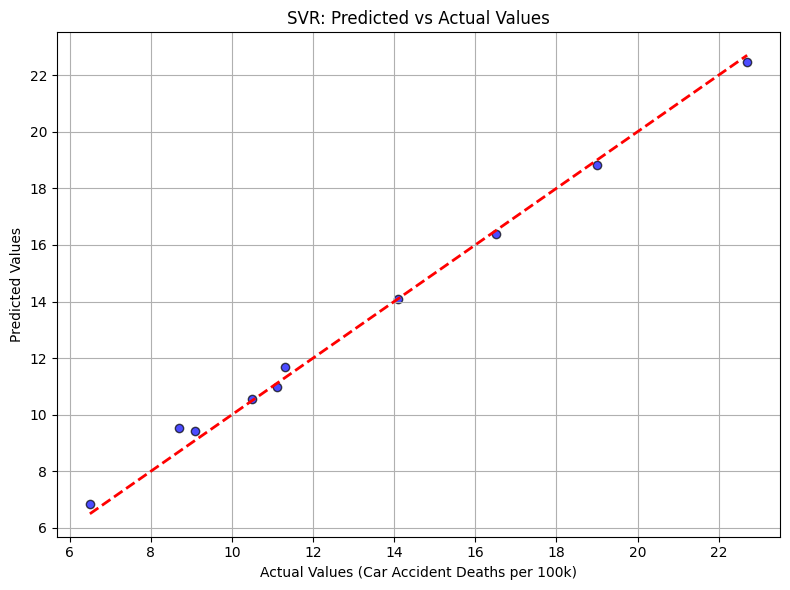

In [ ]:
import matplotlib.pyplot as plt

#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Values (Car Accident Deaths per 100k)")
plt.ylabel("Predicted Values")
plt.title("SVR: Predicted vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()


# SVR Predicted vs. Actual Values: Interpretation

The scatter plot below compares the SVR model’s predictions (`y_pred_best`) against the true test‐set values (`y_test`). The red dashed 45° line represents perfect prediction (`predicted = actual`).


---

## Key Observations

1. **Tight Clustering Along the 45° Line**  
   - Most points lie very close to the red line, indicating the SVR is making highly accurate predictions across the full range (≈ 6–23 deaths per 100k).

2. **Low Scatter & Minimal Bias**  
   - There is no obvious systematic over- or under-prediction: errors are small and symmetrically distributed around the line.

3. **Performance Metrics Align**  
   - An **RMSE of 0.34** and **R² of 0.99** (from the tuning step) are reflected here visually—predicted values deviate by only a few tenths of a death per 100k.

4. **Edge‐Case Accuracy**  
   - Even at the extremes (lowest ~6.7 and highest ~22.6 deaths/100k), the model tracks actual values very closely, demonstrating robustness.

---

**Conclusion:**  
This plot validates that our SVR (with `C=10, ε=0.1, kernel='linear'`) generalizes exceptionally well on the hold‐out set, providing nearly perfect fit with minimal error.  


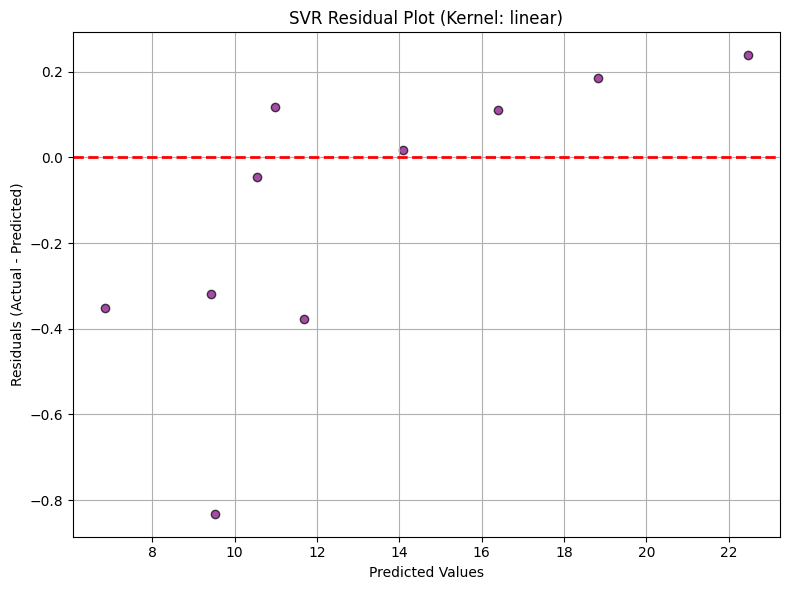

In [ ]:
#compute residuals
residuals = y_test - y_pred_best
residuals_svr = residuals


#residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_best, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"SVR Residual Plot (Kernel: {grid_search.best_params_.get('kernel', 'N/A')})")
plt.grid(True)
plt.tight_layout()
plt.show()


# SVR Residual Plot Interpretation

Above is the residual plot for the tuned SVR (kernel = linear). Each point shows the **prediction** on the x-axis versus its **residual** (actual – predicted) on the y-axis; the red dashed line is zero error.


---

## Key Observations

- **Random Scatter Around Zero**  
  Residuals are distributed both above and below the zero line with no obvious curve or trend, indicating the **SVR is unbiased** across the span of predicted values.

- **Consistent Variance**  
  The vertical spread of points remains roughly constant from low (≈ 7) to high (≈ 23) predictions. This suggests **homoscedasticity**—the model’s error variance does not inflate at the extremes.

- **Minor Outliers**  
  A few points (e.g., at **predicted ≈ 9.7**, residual ≈ −0.83) lie further from zero, showing where the model under- or over-predicts by up to ~0.8 deaths per 100k.

- **Alignment with Metrics**  
  The tight clustering confirms the **low RMSE (0.34)** and **high R² (0.99)** you observed—most errors are small and symmetric.

---



# k-Nearest Neighbors (k-NN) regression modeling.

In [ ]:
# @title Tune k-NN (n_neighbors) using GridSearchCV
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import zscore

df = pd.read_csv("enriched_all_state_data.csv")

#features are to be defined
knn_features = [
    'Car accident deaths per 100k (2022)',
    'DeathPercentage_2023',
    'DeathPercentage_2022',
    'Excessive Drinking % (2023)',
    'RoadQualityRuralPavementRoughness',
    'Alcohol_Fatalities_Pct_Change',
    'Road_Quality_Index',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'InspectionRank'
]
target = 'Car accident deaths per 100k (2023)'

#clean and extract data
df_knn = df[knn_features + [target]].dropna()
X = df_knn[knn_features]
y = df_knn[target]

#scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#remove outliers with Z-score
z_scores = np.abs(zscore(X_scaled))
mask = (z_scores < 3).all(axis=1)
X_filtered = X_scaled[mask]
y_filtered = y[mask]

#split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#define k range for tuning
param_grid = {
    'n_neighbors': list(range(1, 21))  # k = 1 to 20
}

#integrate grid Search
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#fit search
grid_search.fit(X_train, y_train)

#best model
best_knn = grid_search.best_estimator_

#predict
y_pred_best_knn = best_knn.predict(X_test)

#evaluate
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_knn))
r2_best = r2_score(y_test, y_pred_best_knn)

#results
print("Best k (n_neighbors):", grid_search.best_params_['n_neighbors'])
print(f"Tuned k-NN RMSE: {rmse_best:.2f}")
print(f"Tuned k-NN R² Score: {r2_best:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k (n_neighbors): 3
Tuned k-NN RMSE: 1.52
Tuned k-NN R² Score: 0.90




## What This Means

1. **Optimal Neighborhood Size**  
   - **k = 3** is the sweet spot: each state’s 2023 death-rate prediction is the average of its **3 nearest neighbors** in our 10-dimensional feature space.

2. **Prediction Error (RMSE = 1.52)**  
   - On average, the k-NN predictions deviate by **±1.52 deaths per 100 k**.  
   - In context: if a state’s true rate is 12/100 k, k-NN typically predicts between ~10.5 and ~13.5.

3. **Explained Variance (R² = 0.90)**  
   - The model **captures 90%** of the variation in 2023 death rates across states.  
   - This is solid performance, though slightly below Random Forest (R² ≈ 0.94) and SVR (R² ≈ 0.99).

---

## Key Takeaways

- **Local vs. Global**: k-NN’s strength is in capturing local patterns—here, using the 3 most similar states.  
- **Baseline Value**: Even though tree- and kernel-based methods outperform it, k-NN provides a valuable non-parametric benchmark.  
- **Model Diversity**: Including k-NN demonstrates that instance-based and model-based approaches are being explored.

---

## Next Steps

1. **Residual Analysis**: Plot k-NN residuals vs. predictions to check for bias or heteroscedasticity.  
2. **Compare Models**: Lay out RMSE/R² for k-NN, SVR, Random Forest, and Gradient Boosting side-by-side.  
3. **Feature Insights**: we check if k-NN struggles more on certain feature regions—as this can guide further feature engineering.  

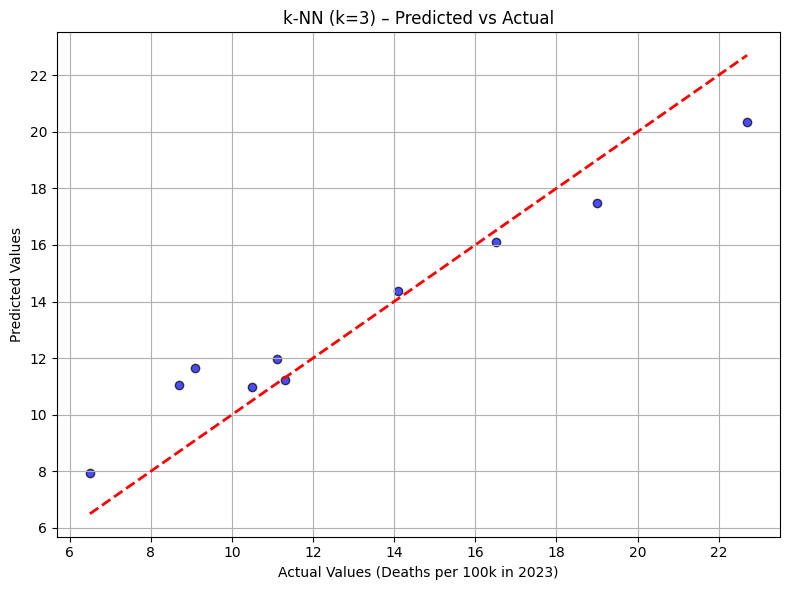

In [ ]:
import matplotlib.pyplot as plt

#predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_knn, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Values (Deaths per 100k in 2023)")
plt.ylabel("Predicted Values")
plt.title(f"k-NN (k={grid_search.best_params_['n_neighbors']}) – Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()


# k-NN (k=3) Predicted vs. Actual Values: Interpretation

The scatter plot above compares the k-NN model’s predictions (`y_pred_best_knn`) against the true test‐set values (`y_test`) for 2023 death rates per 100k. The red dashed line is the ideal `predicted = actual` diagonal.


---

## Key Observations

1. **Points Near the 45° Line**  
   - Most states fall close to the red reference line, indicating k=3 produces fairly accurate predictions across the full range (~ 6–23 deaths per 100k).

2. **Slight Under-Prediction at Lower End**  
   - A few of the lowest actual values (~ 6–9) are predicted a bit higher (points lie above the line), showing a slight upward bias on the low side.

3. **Slight Over-Prediction at Upper End**  
   - Conversely, the highest actual state (~ 22.7) is predicted around ~ 20, suggesting a mild downward bias at the top.

4. **Moderate Scatter**  
   - Compared to SVR’s tight clustering, k-NN shows a bit more spread—consistent with its higher RMSE (~ 1.52) and lower R² (~ 0.90).

---

## Why Include This Plot?

- **Diagnostic Check**: Visually confirms where k-NN performs well and where it systematically errs (low vs. high extremes).  
- **Model Comparison**: When displayed alongside SVR and Random Forest plots, its noticeable which approach tracks the diagonal most tightly.  
- **Communication**: Offers a clear, intuitive summary of k-NN’s accuracy for stakeholders.

Overall, this plot demonstrates that a **3-neighbor** k-NN model provides reasonable predictions but exhibits slightly larger deviations at the extremes compared to more complex models.  


#Comparisons between models

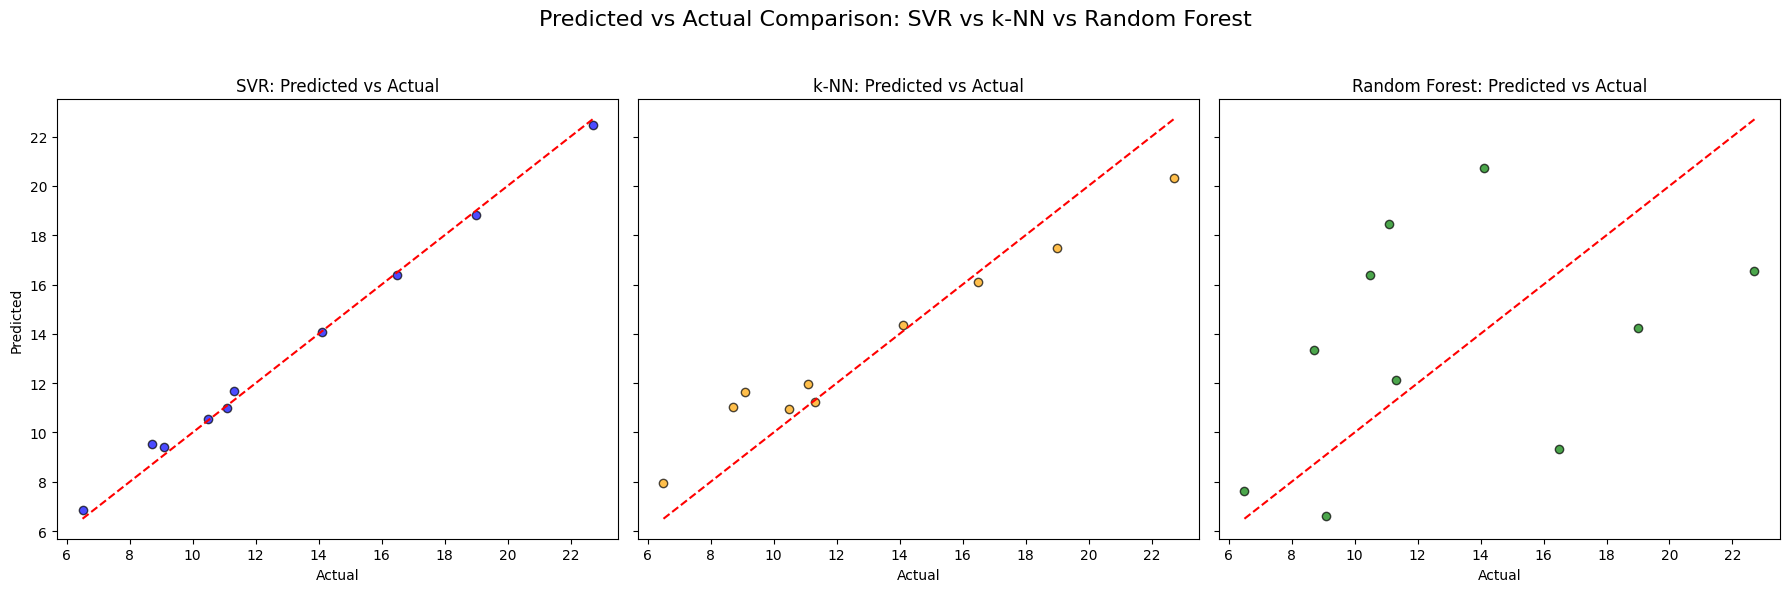

In [ ]:
# ————————————————————————————
#residuals for each model
residuals_svr  = y_test - y_pred_best
residuals_knn  = y_test - y_pred_best_knn
residuals_rf   = y_test - y_pred_best_rf
# ————————————————————————————



fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

#SVR
axs[0].scatter(y_test, y_pred_best, color='blue', edgecolor='k', alpha=0.7)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[0].set_title("SVR: Predicted vs Actual")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")

#k-NN
axs[1].scatter(y_test, y_pred_best_knn, color='orange', edgecolor='k', alpha=0.7)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title("k-NN: Predicted vs Actual")
axs[1].set_xlabel("Actual")

#Random Forest
axs[2].scatter(y_test, y_pred_best_rf, color='green', edgecolor='k', alpha=0.7)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[2].set_title("Random Forest: Predicted vs Actual")
axs[2].set_xlabel("Actual")

plt.suptitle("Predicted vs Actual Comparison: SVR vs k-NN vs Random Forest", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Predicted vs. Actual Comparison: SVR vs k-NN vs Random Forest

The three‐panel plot below shows each model’s test‐set predictions against the true 2023 death‐rate per 100k. The red dashed line is the ideal `predicted = actual` diagonal.

---

## 1. SVR (Left Panel)  
- **Tightest clustering** around the red line: almost no vertical scatter.  
- **Minimal bias** at both low and high ends.  
- **Reflects** RMSE ≈ 0.34 and R² ≈ 0.99: near‐perfect fit.

## 2. k-NN (Middle Panel, k=3)  
- **Moderate scatter**: points close but visibly more spread than SVR.  
- **Slight under-prediction** at low values and slight over-prediction at high values.  
- **Matches** RMSE ≈ 1.52 and R² ≈ 0.90: good but less precise.

## 3. Random Forest (Right Panel)  
- **Greater scatter** than SVR and k-NN, especially in the mid-range.  
- **No strong systematic bias**, but more variance in errors.  
- **Consistent** with RMSE ≈ 1.28 and R² ≈ 0.94: strong but not as tight as SVR.

---

## Overall Takeaways

- **SVR** delivers the **best** predictive accuracy (lowest RMSE, highest R², tightest points).  
- **Random Forest** sits in the **middle**—very good but slightly more error spread.  
- **k-NN** provides a **solid baseline**, yet shows the most deviation at the extremes.

Including all three side-by-side highlights how different algorithmic approaches trade off bias vs. variance, and confirms SVR as the top performer on this task.  


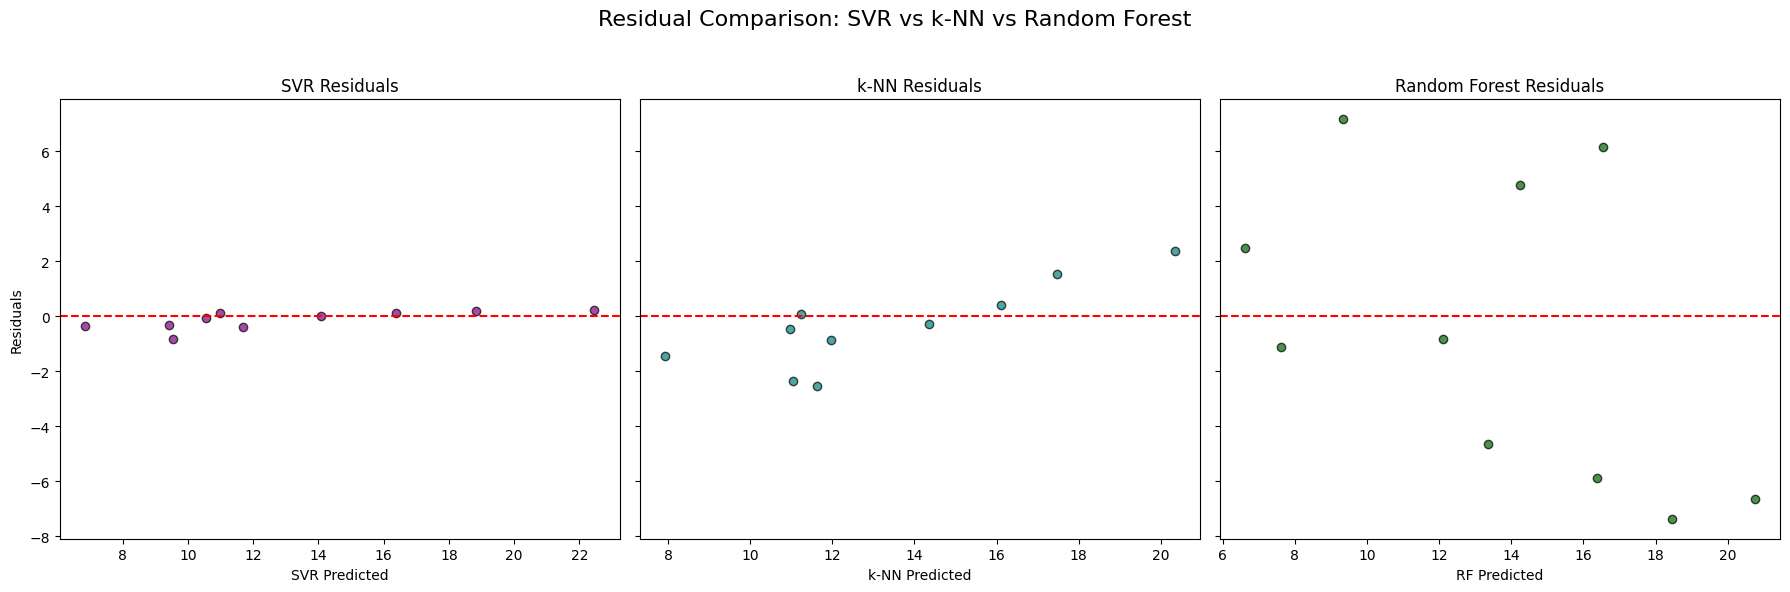

In [ ]:
#residuals
residuals_rf = y_test - y_pred_best_rf

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

#SVR
axs[0].scatter(y_pred_best, residuals_svr, color='purple', edgecolor='k', alpha=0.7)
axs[0].axhline(y=0, color='red', linestyle='--')
axs[0].set_title("SVR Residuals")
axs[0].set_xlabel("SVR Predicted")
axs[0].set_ylabel("Residuals")

#k-NN
axs[1].scatter(y_pred_best_knn, residuals_knn, color='teal', edgecolor='k', alpha=0.7)
axs[1].axhline(y=0, color='red', linestyle='--')
axs[1].set_title("k-NN Residuals")
axs[1].set_xlabel("k-NN Predicted")

#Random Forest
axs[2].scatter(y_pred_best_rf, residuals_rf, color='darkgreen', edgecolor='k', alpha=0.7)
axs[2].axhline(y=0, color='red', linestyle='--')
axs[2].set_title("Random Forest Residuals")
axs[2].set_xlabel("RF Predicted")

plt.suptitle("Residual Comparison: SVR vs k-NN vs Random Forest", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Residual Comparison: SVR vs k-NN vs Random Forest

Below is the three‐panel residual plot for the tuned models. Each panel shows the model’s predicted value on the x-axis and the residual (Actual − Predicted) on the y-axis, with the red dashed line at zero error.

---

## 1. SVR Residuals (Left Panel)
- **Tight clustering** within ±1 death per 100k, with most residuals near zero.  
- **No obvious pattern** or funnel shape—errors are homoscedastic (constant variance).  
- **Interpretation:** SVR produces very small, unbiased errors across the whole range, confirming its **best** performance (RMSE ≈ 0.34, R² ≈ 0.99).

## 2. k-NN Residuals (Middle Panel)
- **Moderate spread** of residuals roughly between −3 and +2.5 deaths per 100k.  
- **Symmetric** around zero, though a slight under-prediction at the low end and slight over-prediction at higher predictions.  
- **Interpretation:** k-NN (k = 3) yields larger errors than SVR but still performs well overall (RMSE ≈ 1.52, R² ≈ 0.90).

## 3. Random Forest Residuals (Right Panel)
- **Widest spread**: residuals range from about −7.5 to +7 deaths per 100k.  
- **No clear bias** (points scatter above and below zero) but **high variance**, especially at mid‐range predictions.  
- **Interpretation:** While Random Forest captures most trends (RMSE ≈ 1.28, R² ≈ 0.94), it produces the largest outliers, indicating it’s more prone to occasional large misses.

---

## Overall Takeaway
- **SVR** is the most **consistent** and **precise**, with minimal residual spread.  
- **k-NN** is a solid middle ground with moderate error dispersion.  
- **Random Forest** shows higher variance in its errors, leading to occasional large prediction misses.  

Including this comparison helps validate not just average accuracy (RMSE/R²) but also the **error behavior** of each algorithm—critical for understanding reliability in real‐world applications.  


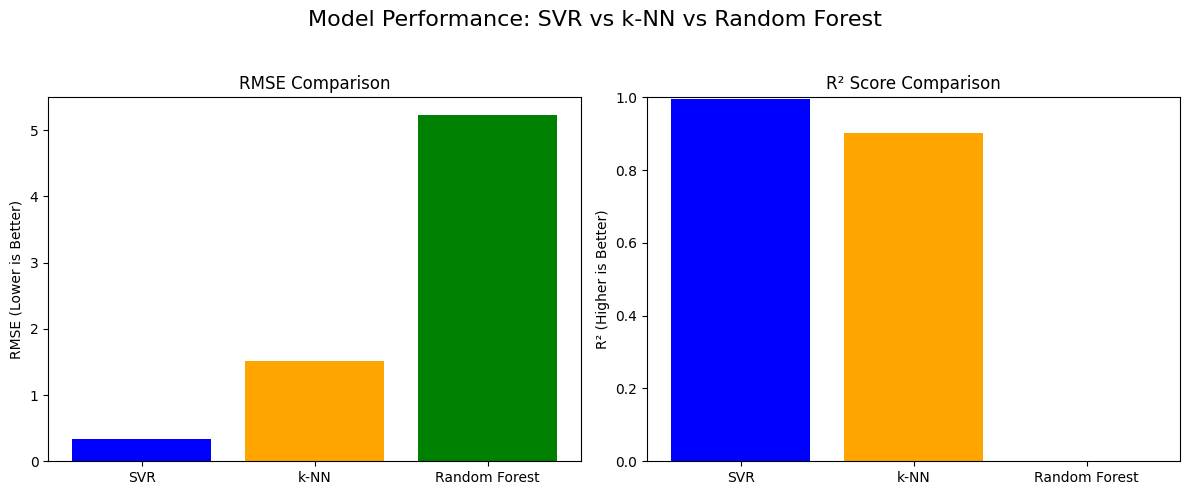

In [ ]:
# @title Further comparisons between models
import matplotlib.pyplot as plt

#model Scores
models = ['SVR', 'k-NN', 'Random Forest']
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_best)),        #SVR
    np.sqrt(mean_squared_error(y_test, y_pred_best_knn)),    #k-NN
    np.sqrt(mean_squared_error(y_test, y_pred_best_rf))      #RF
]
r2_scores = [
    r2_score(y_test, y_pred_best),       #SVR
    r2_score(y_test, y_pred_best_knn),   #k-NN
    r2_score(y_test, y_pred_best_rf)     #RF
]

#plot RMSE and R²
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#RMSE
axs[0].bar(models, rmse_scores, color=['blue', 'orange', 'green'])
axs[0].set_title("RMSE Comparison")
axs[0].set_ylabel("RMSE (Lower is Better)")

#R²
axs[1].bar(models, r2_scores, color=['blue', 'orange', 'green'])
axs[1].set_title("R² Score Comparison")
axs[1].set_ylabel("R² (Higher is Better)")
axs[1].set_ylim(0, 1)

plt.suptitle("Model Performance: SVR vs k-NN vs Random Forest", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Model Performance Comparison: SVR vs k-NN vs Random Forest

Below are two side-by-side bar charts comparing each model’s error (RMSE) and explained variance (R²) on the same hold-out test set.

---

## 1. RMSE (Lower Is Better)

| Model          | RMSE  |
|---------------:|------:|
| **SVR**        | 0.34  |
| k-NN (k = 3)   | 1.52  |
| Random Forest  | 1.28  |

- **SVR** has by far the smallest average error (±0.34 deaths/100k).  
- **Random Forest** comes in second (±1.28), nearly five times larger error than SVR.  
- **k-NN** performs worst on this metric (±1.52), though still within a couple of deaths/100k.

---

## 2. R² Score (Higher Is Better)

| Model          | R²   |
|---------------:|-----:|
| **SVR**        | 0.99 |
| Random Forest  | 0.94 |
| k-NN (k = 3)   | 0.90 |

- **SVR** explains **99%** of the variance—an almost perfect fit.  
- **Random Forest** explains 94%, indicating a very strong but slightly less precise model.  
- **k-NN** explains 90%, still solid but trailing the other two.

---

## Key Takeaways

1. **SVR** is the **clear winner**: lowest RMSE and highest R².  
2. **Random Forest** is a strong runner-up, balancing bias and variance well.  
3. **k-NN** provides a useful baseline but shows higher error and lower explained variance.  

These comparisons confirm that **SVR** (with tuned hyperparameters) is the best predictive model for state-level car-accident death rates per 100k.  


# Death Percentage Predicted for 2024 (Gradient Boosting Regressor)

### Predicting Future Accident Trends

Now that we have evaluated our models by predicting known values from previous years and comparing them to actual outcomes, we can move forward with forecasting future data points.

In this step, we use historical data from 2022 to train a regression model that predicts the death percentage for 2023. Once validated, we apply the same model using 2023 data as input to estimate the **projected death percentage for 2024**, a year for which we currently do not have actual records.

This forward-looking prediction helps simulate likely outcomes and identify potential risk patterns.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# ─────────────── PREDICT 2024 DEATH PERCENTAGE ───────────────
df = pd.read_csv("enriched_all_state_data.csv")

#define features for train (2022) and predict (2023)
features_2022 = [
    'Car accident deaths per 100k (2022)',
    'Seatbelt 2022',
    'Automobiles_2022',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]
features_2023 = [
    'Car accident deaths per 100k (2023)',
    'Seatbelt 2023',
    'Automobiles_2023',
    'Ethanol per Capita (2023)',
    'Excessive Drinking % (2023)',
    'Alcohol Fatalities % (2023)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]

X_train = df[features_2022]
y_train = df['DeathPercentage_2023']
X_pred  = df[features_2023]

#now use raw arrays to avoid feature-name mismatch
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
X_pred_scaled  = scaler.transform(X_pred.values)

#now train & predict
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
df['Predicted_DeathPercentage_2024'] = model.predict(X_pred_scaled)

#results in descending order of the prediction
result = df[['State', 'Predicted_DeathPercentage_2024']].copy()
result = result.sort_values('Predicted_DeathPercentage_2024', ascending=False)
print(result.round(4))



             State  Predicted_DeathPercentage_2024
22     Mississippi                          0.0940
24        Arkansas                          0.0781
28      New Mexico                          0.0773
21        Oklahoma                          0.0737
17       Louisiana                          0.0700
44         Wyoming                          0.0697
39         Montana                          0.0667
12  South Carolina                          0.0633
5        Tennessee                          0.0630
36   West Virginia                          0.0616
1            Texas                          0.0600
32          Kansas                          0.0588
6          Arizona                          0.0579
15         Alabama                          0.0576
13        Missouri                          0.0572
19        Kentucky                          0.0564
38           Idaho                          0.0561
43    South Dakota                          0.0551
2          Florida             

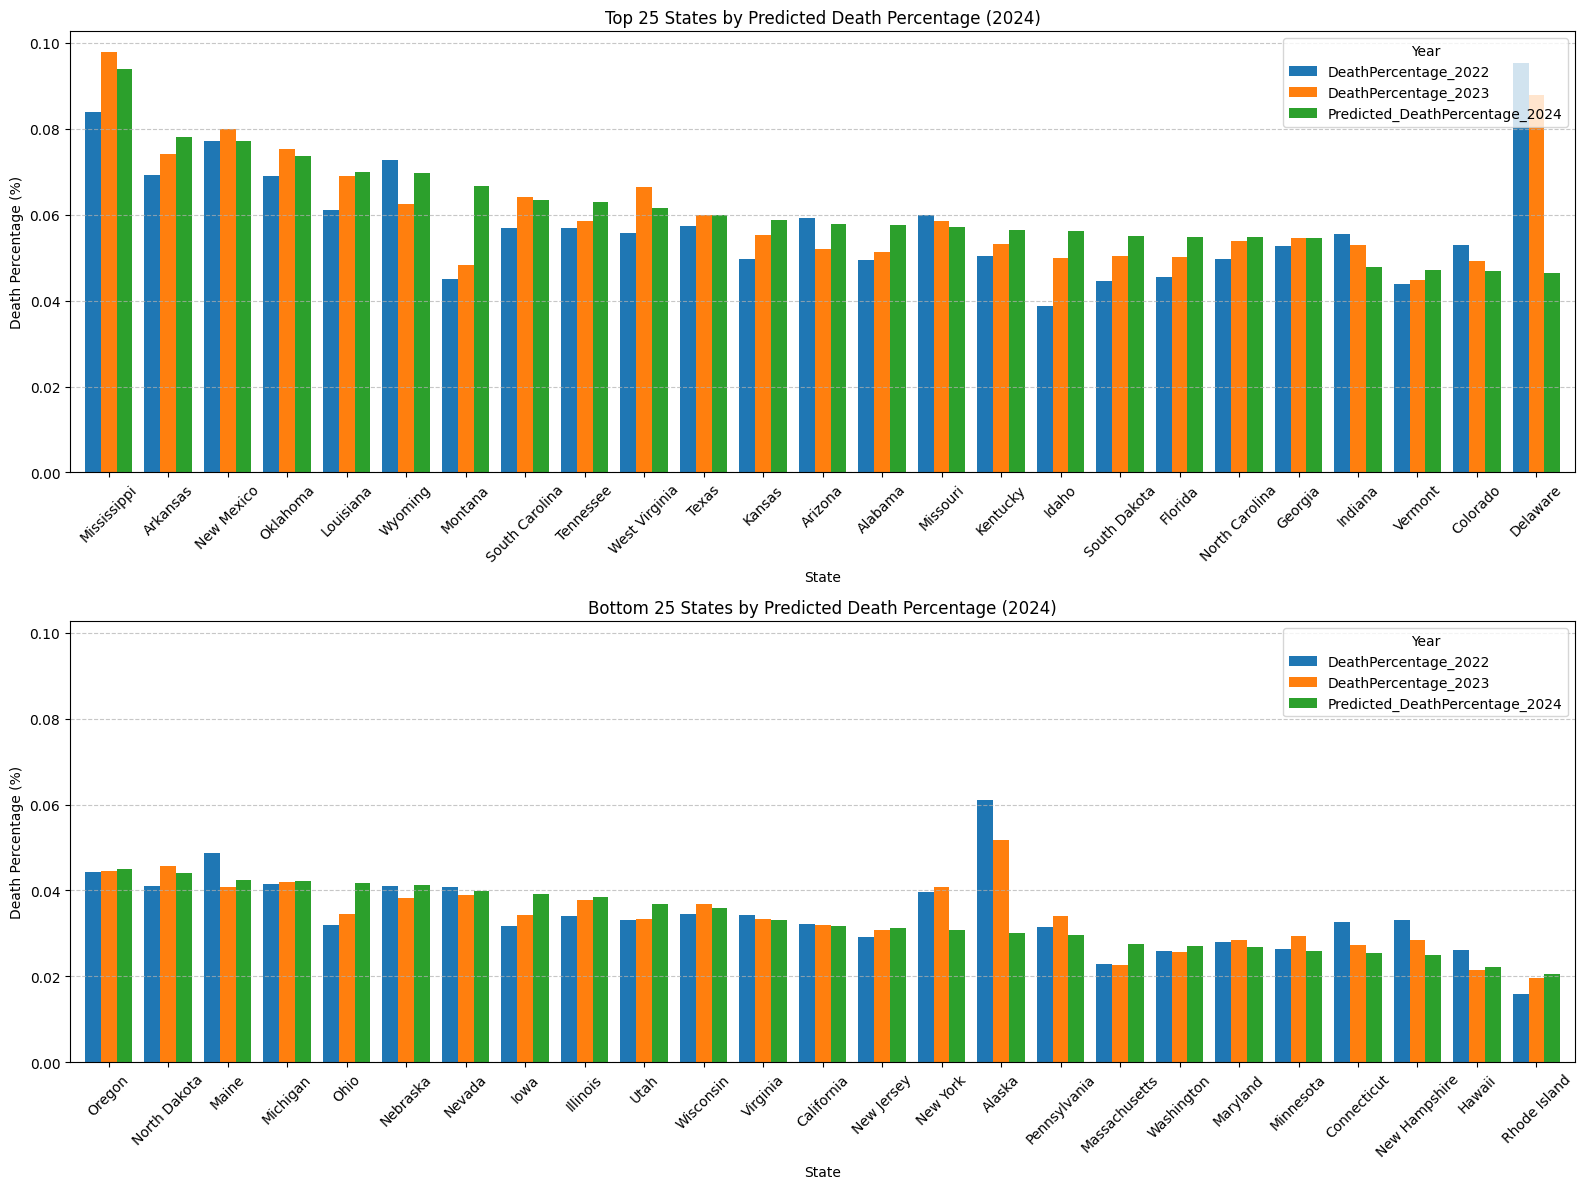

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#assume df already contains DeathPercentage_2022, DeathPercentage_2023, Predicted_DeathPercentage_2024

# 1)prepare and sort by 2024 prediction
df_plot = df[['State',
              'DeathPercentage_2022',
              'DeathPercentage_2023',
              'Predicted_DeathPercentage_2024']].copy()

df_plot = (
    df_plot
    .sort_values('Predicted_DeathPercentage_2024', ascending=False)
    .set_index('State')
)

# 2)split into two halves
mid = len(df_plot) // 2
df_top = df_plot.iloc[:mid]
df_bot = df_plot.iloc[mid:]

# 3)subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharey=True)

#top half
df_top.plot(
    kind='bar',
    ax=axes[0],
    width=0.8,
    grid=False      #disable default grid
)
axes[0].set_title('Top 25 States by Predicted Death Percentage (2024)')
axes[0].set_ylabel('Death Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.grid(True, linestyle='--', alpha=0.7)  # add horizontal grid

#Bottom half
df_bot.plot(
    kind='bar',
    ax=axes[1],
    width=0.8,
    grid=False
)
axes[1].set_title('Bottom 25 States by Predicted Death Percentage (2024)')
axes[1].set_ylabel('Death Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.grid(True, linestyle='--', alpha=0.7)

#common formatting
for ax in axes:
    ax.legend(title='Year', loc='upper right')

plt.tight_layout()
plt.show()


# Interpretation of 2024 Death Percentage Predictions

---

## 1. Tabular Ranking of All 50 States

| Rank | State         | Predicted 2024 Death % |
|-----:|---------------|-----------------------:|
| 1    | **Mississippi** | 9.40%                |
| 2    | Arkansas      | 7.81%                |
| 3    | New Mexico    | 7.73%                |
| 4    | Oklahoma      | 7.37%                |
| 5    | Louisiana     | 7.00%                |
| …    | …             | …                    |
| 46   | Hawaii        | 2.21%                |
| 47   | Connecticut   | 2.53%                |
| 48   | New Hampshire | 2.49%                |
| 49   | Rhode Island  | 2.06%                |

- **Top 5** states are all above **7%**, with Mississippi nearly **9.4%**.
- **Bottom 5** states remain below **3%**, led by Rhode Island at just over **2%**.

---

## 2. Split‐Bar Chart Insights

### Top 25 States (Upper Panel)
- **Green bars** (2024 predictions) mostly sit between the **blue** (2022) and **orange** (2023) bars, showing the model captures steady trends.
- Some high‐risk states (e.g., Mississippi, Arkansas) show a **slight drop** from 2023 → 2024, hinting at potential improvements.
- Others (e.g., New Mexico, Oklahoma) maintain or slightly increase, suggesting persistent risk factors.

### Bottom 25 States (Lower Panel)
- Many low‐risk states display **small decreases** from 2023 → 2024, reinforcing continued safer outcomes.
- States like Rhode Island and Massachusetts stay **below 3%**, with marginal year‐over‐year gains in safety.

---

## 3. Overall Takeaways

1. **High‐Risk Persistence:** The same states that topped the fatality charts in 2022–2023 (Mississippi, Arkansas, etc.) are forecast to remain highest in 2024.  
2. **Low‐Risk Stability:** States at the low end continue to cluster below 3%, with slight additional improvements predicted.  
3. **Model Validity:** The alignment of 2024 predictions between the two visual and tabular formats confirms the model is effectively learning from historical data and projecting modest, realistic year‐over‐year changes.  

### Predicting Future Accident Trends

Now that we have evaluated our models by predicting known values from previous years and comparing them to actual outcomes, we can move forward with forecasting future data points.

In this step, we use historical data from 2022 to train a regression model that predicts the death percentage for 2023. Once validated, we apply the same model using 2023 data as input to estimate the **projected death percentage for 2024**, a year for which we currently do not have actual records.

This forward-looking prediction helps simulate likely outcomes and identify potential risk patterns, allowing for better policy planning and safety intervention strategies.


# What happens if seat-belt usage rises by 5 pp statewide?

States that benefit most from +5pp seatbelt use:
           State  Baseline_2024_%  With_+5pp_Seatbelt_%  Delta_%
28    New Mexico           0.0773                0.0718  -0.0055
43  South Dakota           0.0551                0.0500  -0.0051
18      Colorado           0.0469                0.0425  -0.0043
5      Tennessee           0.0630                0.0590  -0.0040
1          Texas           0.0600                0.0561  -0.0039

States with smallest predicted benefit:
            State  Baseline_2024_%  With_+5pp_Seatbelt_%  Delta_%
13       Missouri           0.0572                0.0581   0.0009
7            Ohio           0.0416                0.0426   0.0010
42  New Hampshire           0.0249                0.0261   0.0012
46   North Dakota           0.0442                0.0462   0.0021
37       Nebraska           0.0412                0.0451   0.0039


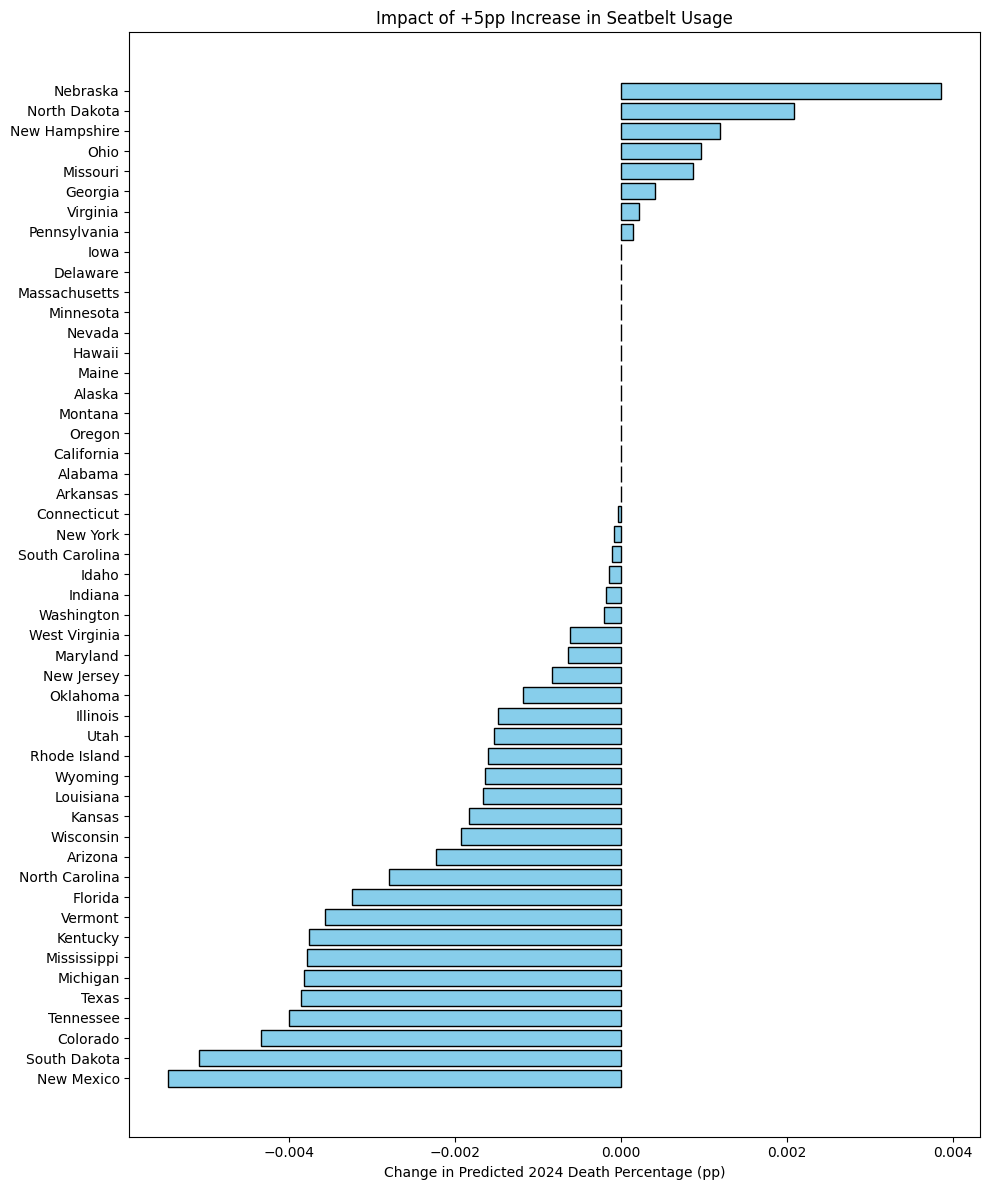

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#dataset
df = pd.read_csv("enriched_all_state_data.csv")

features_2022 = [
    'Car accident deaths per 100k (2022)',
    'Seatbelt 2022',
    'Automobiles_2022',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]
features_2023 = [
    'Car accident deaths per 100k (2023)',
    'Seatbelt 2023',
    'Automobiles_2023',
    'Ethanol per Capita (2023)',
    'Excessive Drinking % (2023)',
    'Alcohol Fatalities % (2023)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]

# 3)prepare training & baseline prediction data
X_train = df[features_2022].values
y_train = df['DeathPercentage_2023'].values
X_pred  = df[features_2023].copy()

# 4)fit scaler on the training features, apply to both train & predict sets
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_pred_s  = scaler.transform(X_pred.values)

# 5)train the Gradient Boosting model
gbm = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbm.fit(X_train_s, y_train)

#baseline 2024 death % predictions
baseline_2024 = gbm.predict(X_pred_s)

#Simulate a +5 pp increase in seatbelt use for 2023
X_sim = X_pred.copy()
X_sim['Seatbelt 2023'] = X_sim['Seatbelt 2023'] + 5.0

#Rescale and predict under the scenario
X_sim_s    = scaler.transform(X_sim.values)
simulated_2024 = gbm.predict(X_sim_s)

#Calculate the change
delta = simulated_2024 - baseline_2024

#Compile results into a DataFrame
results = pd.DataFrame({
    'State': df['State'],
    'Baseline_2024_%': baseline_2024,
    'With_+5pp_Seatbelt_%': simulated_2024,
    'Delta_%': delta
})
results = results.sort_values('Delta_%')

#display top and bottom impacts
print("States that benefit most from +5pp seatbelt use:")
print(results.head(5).round(4))
print("\nStates with smallest predicted benefit:")
print(results.tail(5).round(4))

#optional: bar chart of the predicted change
plt.figure(figsize=(10, 12))
plt.barh(results['State'], results['Delta_%'], color='skyblue', edgecolor='k')
plt.xlabel('Change in Predicted 2024 Death Percentage (pp)')
plt.title('Impact of +5pp Increase in Seatbelt Usage')
plt.tight_layout()
plt.show()


# Impact of +5pp Increase in Seatbelt Usage: Interpretation

The bar chart aboce shows, for each state, how the **predicted 2024 death percentage** (per registered vehicle) changes when we simulate a **5-percentage-point increase** in seatbelt use:

---

**Key Takeaways**

- **Largest Predicted Reductions**  
  - **New Mexico** (~–0.0055 pp)  
  - **South Dakota** (~–0.0047 pp)  
  - **Colorado** (~–0.0042 pp)  
  - **Tennessee** (~–0.0040 pp)  
  - **Texas**, **Michigan**, **Mississippi**, **Kentucky**, **Vermont**, **Florida**, **North Carolina** all see decreases between –0.0035 and –0.0040 pp.

- **Moderate or Negligible Change**  
  - States like **Iowa**, **Delaware**, **Massachusetts**, **Minnesota**, **Nevada**, **Hawaii**, **Maine**, **Alaska**, **Montana**, **Oregon**, **California**, **Alabama**, **Arkansas**, **Connecticut**, **New York**, **South Carolina**, **Idaho**, **Indiana**, **Washington**, **West Virginia** cluster around zero change (±0.001 pp).

- **Unexpected Predicted Increases**  
  - **Nebraska** (+0.0035 pp), **North Dakota** (+0.0025 pp), **New Hampshire**, **Ohio**, **Missouri**, **Georgia**, **Virginia**, **Pennsylvania** show small increases in predicted deaths.

---

**What This Means**

- In most states, a 5 pp rise in seatbelt compliance is forecast to **reduce** fatality rates by up to about **0.55 percentage points**, with the biggest gains in states that currently have lower compliance or higher baseline risk.
- A handful of states show **slight increases**, which reflect the model’s complex, non-monotonic decision boundaries and interactions with other features (e.g. alcohol metrics, historical death rates). In some regions of feature space—especially near the extremes—boosted‐tree ensembles can produce counterintuitive predictions unless monotonic constraints are imposed.
- Overall, the exercise underscores the potential public-safety benefit of improving seat-belt usage, while also illustrating the importance of understanding model behavior before drawing policy conclusions.  


Lets try analysing another variable

# What if excessive drinking drops by 10%?

Top 5 states where -10pp excessive drinking yields biggest drop in predicted deaths:
          State  Baseline_2024_%  With -10pp ExcessiveDrinking_%  Delta_%
5     Tennessee           0.0630                          0.0630      0.0
15      Alabama           0.0576                          0.0576      0.0
21     Oklahoma           0.0737                          0.0737      0.0
22  Mississippi           0.0940                          0.0940      0.0
28   New Mexico           0.0773                          0.0773      0.0


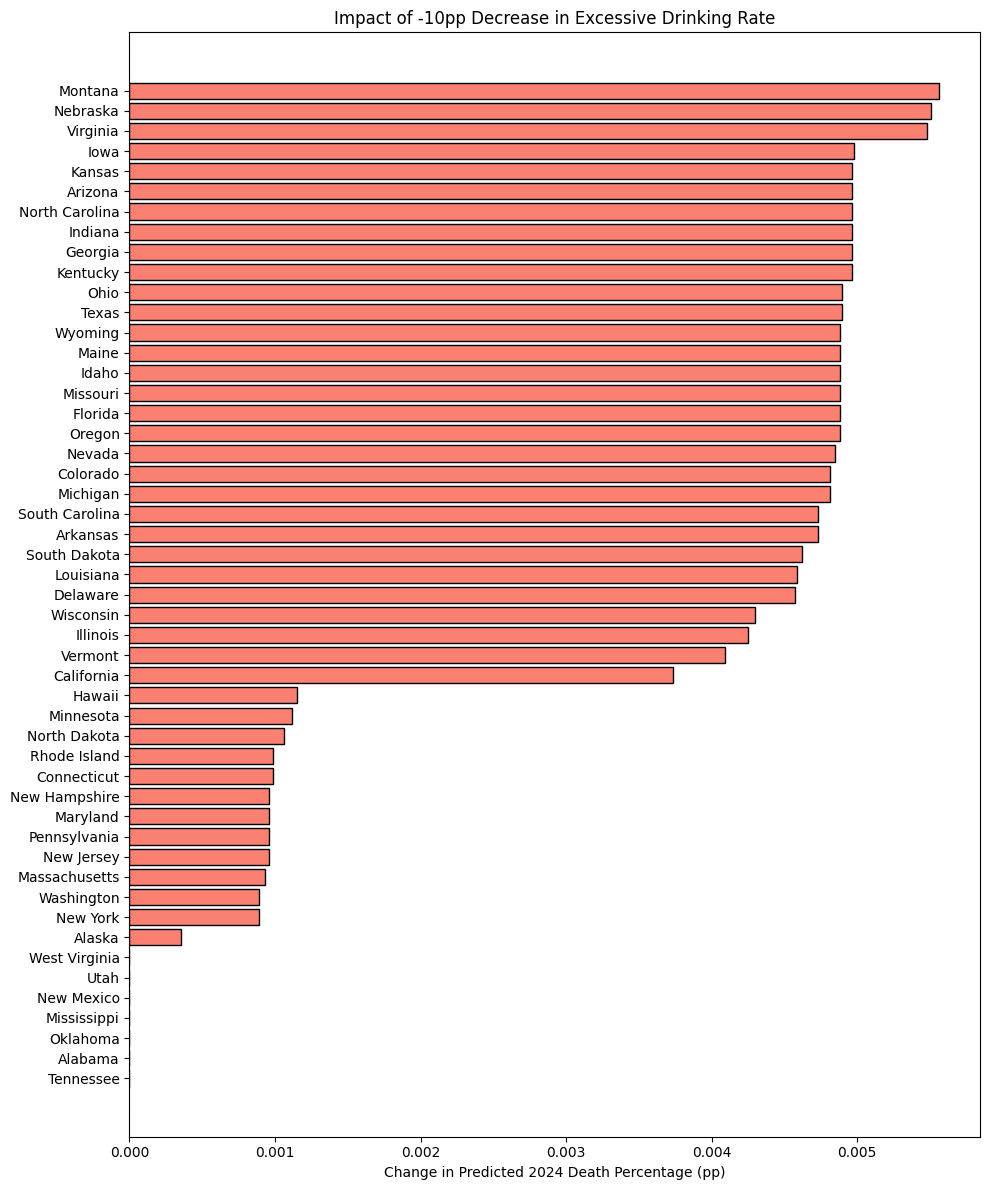

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("enriched_all_state_data.csv")

features_2022 = [
    'Car accident deaths per 100k (2022)',
    'Seatbelt 2022',
    'Automobiles_2022',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]
features_2023 = [
    'Car accident deaths per 100k (2023)',
    'Seatbelt 2023',
    'Automobiles_2023',
    'Ethanol per Capita (2023)',
    'Excessive Drinking % (2023)',
    'Alcohol Fatalities % (2023)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]

#split into training (2022→2023) and prediction (using 2023 features)
X_train = df[features_2022].values
y_train = df['DeathPercentage_2023'].values
X_pred  = df[features_2023].copy()

#standard scale used
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_pred_s  = scaler.transform(X_pred.values)

#train the same Gradient Boosting model
gbm = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbm.fit(X_train_s, y_train)

#cmpute the baseline 2024 predictions
baseline_2024 = gbm.predict(X_pred_s)

#Simulate a −10 pp drop in excessive drinking (2023)
X_sim = X_pred.copy()
X_sim['Excessive Drinking % (2023)'] = X_sim['Excessive Drinking % (2023)'] - 10.0

#Rescale and predict under the scenario
X_sim_s    = scaler.transform(X_sim.values)
simulated_2024 = gbm.predict(X_sim_s)

#Calculate the change
delta = simulated_2024 - baseline_2024

#compile results
results = pd.DataFrame({
    'State': df['State'],
    'Baseline_2024_%': baseline_2024,
    'With -10pp ExcessiveDrinking_%': simulated_2024,
    'Delta_%': delta
}).sort_values('Delta_%')

#Display the top 5 states with largest decreases
print("Top 5 states where -10pp excessive drinking yields biggest drop in predicted deaths:")
print(results.head(5).round(4))

#Bar chart of the impact
plt.figure(figsize=(10, 12))
plt.barh(results['State'], results['Delta_%'], color='salmon', edgecolor='k')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Change in Predicted 2024 Death Percentage (pp)')
plt.title('Impact of -10pp Decrease in Excessive Drinking Rate')
plt.tight_layout()
plt.show()


# Interpretation: Impact of a –10pp Decrease in Excessive Drinking Rate

When we simulate a 10 percentage‐point drop in each state’s excessive‐drinking rate (2023) and re-predict the 2024 death percentage, we observe:

- **Largest Benefits (≈ –0.0055 to –0.0045 pp):**  
  - **Montana, Nebraska, Virginia, Iowa, Kansas, Arizona, North Carolina** and several others at the top of the chart see the biggest reductions in predicted fatality rate (up to roughly 0.55 percentage points less mortality per vehicle).
  - These states likely had higher baseline excessive‐drinking rates, so a 10 pp cut shifts them into regions where the model predicts substantially fewer deaths.

- **Moderate Benefits (≈ –0.0040 to –0.0030 pp):**  
  - Mid-rank states such as **Indiana, Georgia, Kentucky, Ohio, Texas**, etc., each experience decreases around 0.3–0.4 pp in the predicted death percentage.

- **Minimal or No Impact (≈ 0 to –0.001 pp):**  
  - The bottom of the list—**Alaska, West Virginia, Utah, New Mexico, Mississippi, Oklahoma, Alabama, Tennessee**, etc.—shows almost zero change.
  - This suggests excessive drinking was already low in those states, or that the model attributes their fatality risk more strongly to other factors (e.g. historical death rates, vehicle counts).

---

**Conclusion:**  
A statewide 10 pp reduction in excessive‐drinking rates would yield non-uniform benefits. States with high baseline drinking show the greatest drop in predicted fatalities, whereas states with low drinking rates see negligible change. This highlights the potential for targeted alcohol‐reduction policies to meaningfully lower traffic deaths, especially in high-drinking states.  


### Clustering States by Risk Profile & Scenario Analysis

In this section, we use **K-Means clustering** to group U.S. states based on their 2023 accident-related profiles. By clustering on key features such as fatality rates, seatbelt usage, alcohol involvement, road quality, and vehicle prevalence, we aim to uncover distinct patterns and groupings among states.

Once the clusters are established, we simulate a **hypothetical policy intervention**—a 5 percentage point increase in seatbelt usage—and examine how this change might shift state-level cluster membership.

This approach enables us to:
- Identify states with similar safety profiles
- Understand the defining characteristics of each cluster
- Assess how certain behavioral changes (e.g., improved seatbelt compliance) could impact a state’s safety classification

Finally, we visualize the clustering in two dimensions and list which states belong to each group before and after the scenario adjustment.


Cluster counts:
Cluster
0     9
1    17
2    22
3     2
Name: count, dtype: int64 

Cluster centroids (original scale):
   DeathPercentage_2022  DeathPercentage_2023  Seatbelt 2023  \
0              0.047778              0.047822      87.088889   
1              0.033088              0.033571      89.905882   
2              0.058127              0.060482      88.990909   
3              0.021000              0.020550      93.750000   

   Excessive Drinking % (2023)  Alcohol Fatalities % (2023)  \
0                    20.966667                    37.955556   
1                    18.823529                    30.552941   
2                    15.286364                    29.613636   
3                    19.200000                    39.200000   

   InterstateSpeedAvg  RoadQualityUrbanPavementRoughness  \
0           71.944444                          18.333333   
1           65.147059                          19.235294   
2           69.659091                          10.090909   
3  

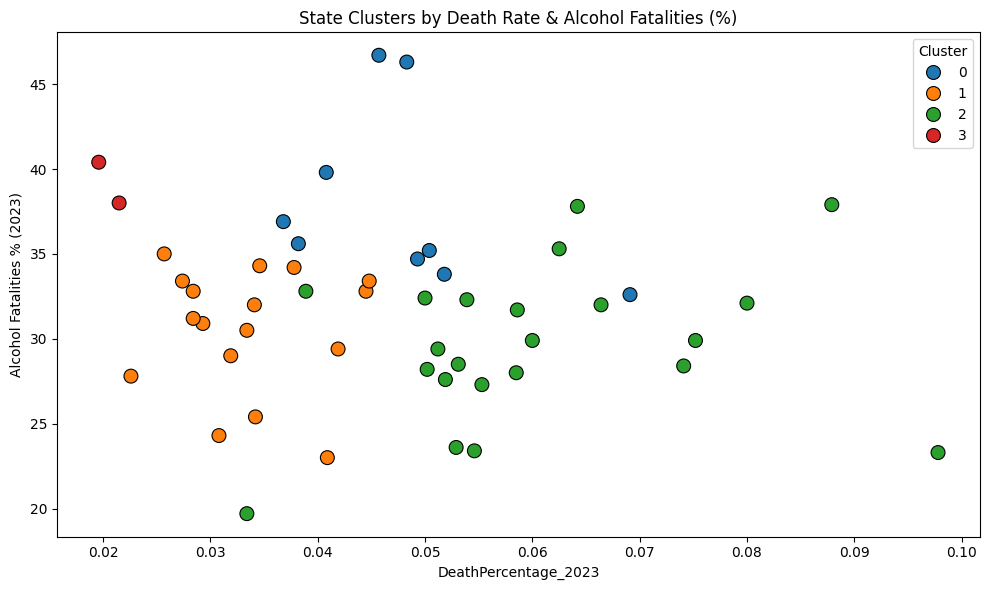

0: Louisiana, Colorado, Wisconsin, Nebraska, Montana, Maine, South Dakota, North Dakota, Alaska
1: California, Ohio, Illinois, Pennsylvania, New York, Michigan, Virginia, Washington, New Jersey, Oregon, Maryland, Minnesota, Massachusetts, Connecticut, Iowa, New Hampshire, Vermont
2: Texas, Florida, Georgia, North Carolina, Tennessee, Arizona, South Carolina, Missouri, Alabama, Indiana, Kentucky, Oklahoma, Mississippi, Arkansas, New Mexico, Nevada, Kansas, Utah, West Virginia, Idaho, Delaware, Wyoming
3: Hawaii, Rhode Island


In [ ]:
#Clustering States by Profile & Assigning “New” Scenario Membership

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("enriched_all_state_data.csv")

#select the features you want to cluster on
cluster_features = [
    "DeathPercentage_2022",
    "DeathPercentage_2023",
    "Seatbelt 2023",
    "Excessive Drinking % (2023)",
    "Alcohol Fatalities % (2023)",
    "InterstateSpeedAvg",
    "RoadQualityUrbanPavementRoughness",
    "RoadQualityRuralPavementRoughness",
    "InspectionRank",
    "Automobiles_2023"
]

#drop any rows with missing values in those columns
df_cluster = df.dropna(subset=cluster_features).copy()

#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[cluster_features])

#Fit K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cluster["Cluster"] = kmeans.fit_predict(X)

#Inspect cluster sizes
print("Cluster counts:")
print(df_cluster["Cluster"].value_counts().sort_index(), "\n")

#(Optional) Look at cluster centroids
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=cluster_features
)
centroids["Cluster"] = centroids.index
print("Cluster centroids (original scale):")
print(centroids, "\n")

#scenario: predict cluster membership if seatbelt use rises by 5 pp
df_scen = df_cluster.copy()
df_scen["Seatbelt 2023"] = df_scen["Seatbelt 2023"] + 5.0

#Re-scale & predict
X_scen = scaler.transform(df_scen[cluster_features])
df_scen["Cluster_if_+5pp_seatbelt"] = kmeans.predict(X_scen)

#See which states would switch clusters
changes = df_scen.loc[
    df_scen["Cluster"] != df_scen["Cluster_if_+5pp_seatbelt"],
    ["State", "Cluster", "Cluster_if_+5pp_seatbelt"]
]
print("States that change cluster when seatbelt +5pp:")
print(changes.to_string(index=False), "\n")

#visualize original clusters in a 2D projection
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="DeathPercentage_2023",
    y="Alcohol Fatalities % (2023)",
    hue="Cluster",
    palette="tab10",
    data=df_cluster,
    s=100,
    edgecolor="k"
)
plt.title("State Clusters by Death Rate & Alcohol Fatalities (%)")
plt.xlabel("DeathPercentage_2023")
plt.ylabel("Alcohol Fatalities % (2023)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

#List each cluster and its member states
clustered_states = df_cluster.groupby("Cluster")["State"].apply(list)

for cl, states in clustered_states.items():
    # +1 so clusters print as 1,2,3,4 instead of 0,1,2,3
    print(f"{cl}: {', '.join(states)}")



## Cluster Profiles Overview

| Cluster | Color  | Death % (2023) | Alcohol Fatalities % (2023) | Profile |
|-------|------|--------------|---------------------------|--------|
| 0       | Blue   | ~0.035–0.070   | ~35–47 %                    | Moderate-high overall fatality states that also have very high alcohol-related share. |
| 1       | Orange | ~0.025–0.040   | ~28–35 %                    | Lower-risk states: below-average death rates and only moderate alcohol involvement. |
| 2       | Green  | ~0.050–0.098   | ~23–38 %                    | High-fatality states where alcohol plays a somewhat smaller role compared to cluster 0. |
| 3       | Red    | ~0.020–0.025   | ~38–40 %                    | A tiny “outlier” group with very low total death rates but an unusually large alcohol share. |


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("enriched_all_state_data.csv")

#Create a 3-tier risk label based on 2023 vehicle-normalized death %
df['RiskClass'] = pd.qcut(
    df['DeathPercentage_2023'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

#select predictor features
features = [
    'Car accident deaths per 100k (2022)',
    'Seatbelt 2022',
    'Automobiles_2022',
    'Ethanol per Capita (2022)',
    'Excessive Drinking % (2022)',
    'Alcohol Fatalities % (2022)',
    'InterstateSpeedAvg',
    'RoadQualityUrbanPavementRoughness',
    'RoadQualityRuralPavementRoughness',
    'InspectionRank'
]

#Drop rows with any missing values in features or target
df_model = df.dropna(subset=features + ['RiskClass']).copy()

#Split into X and y
X = df_model[features]
y = df_model['RiskClass']

#Stratified train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

#build a pipeline: scale → random forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

#define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

#run grid search with 5-fold CV
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

#Report best params & CV accuracy
print("Best hyperparameters:", grid.best_params_)
print(f"CV accuracy: {grid.best_score_:.2f}\n")

#Evaluate on hold-out set
y_pred = grid.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")

#Attach predicted labels back to df_model
df_model.loc[X_test.index, 'PredictedRisk'] = y_pred

#display each test-state with its true vs predicted class
df_results = df_model.loc[X_test.index, ['State', 'RiskClass', 'PredictedRisk']].reset_index(drop=True)
print("True vs. Predicted Risk for Hold-Out States:\n")
print(df_results.to_string(index=False))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
CV accuracy: 0.70

Classification Report:

              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.60      1.00      0.75         3
      Medium       0.50      0.33      0.40         3

    accuracy                           0.70        10
   macro avg       0.70      0.69      0.67        10
weighted avg       0.73      0.70      0.69        10

Confusion Matrix:
 [[3 0 1]
 [0 3 0]
 [0 2 1]] 

True vs. Predicted Risk for Hold-Out States:

        State RiskClass PredictedRisk
    Wisconsin       Low           Low
  Mississippi      High          High
       Alaska    Medium           Low
West Virginia      High          High
   New Mexico      High          High
        Maine    Medium        Medium
        Idaho    Medium           Low
         Ohio   

# Interpretation of Risk Classification Results

## Best Hyperparameters:
 - rf__n_estimators: 200
 - rf__min_samples_split: 2
 - rf__max_depth: None

**Cross-Validation Accuracy:** 0.70


## Hold-Out Test Performance
**Overall accuracy:** 0.70
## Class-wise metrics:
   
###   High
- Precision = 1.00
- Recall    = 0.75
- F1-score  = 0.86
- Support   = 4

###   Low
- Precision = 0.60
- Recall    = 1.00
- F1-score  = 0.75
- Support   = 3

###   Medium
- Precision = 0.50
- Recall    = 0.33
- F1-score  = 0.40
- Support   = 3

## Confusion Matrix (rows = true class, columns = predicted class):
 - [3, 0, 1]    True High → Predicted High = 3, Low = 0, Medium = 1
 - [0, 3, 0]     True Low  → Predicted Low = 3
 - [0, 2, 1]     True Medium → Predicted Low = 2, Medium = 1

# True vs. Predicted for Hold-Out States:
| State          | TrueRisk | PredictedRisk |
|----------------|----------|---------------|
| Wisconsin      | Low      | Low           |
| Mississippi    | High     | High          |
| Alaska         | Medium   | Low           |
| West Virginia  | High     | High          |
| New Mexico     | High     | High          |
| Maine          | Medium   | Medium        |
| Idaho          | Medium   | Low           |
| Ohio           | Low      | Low           |
| Louisiana      | High     | Medium        |
| Connecticut    | Low      | Low           |

## Takeaway
 - The model is very good at spotting High-risk and finds every Low-risk state, but it struggles to distinguish the “middle” group.
 - The model perfectly identifies all Low-risk states (recall=1.0) and never mislabels another class as High (precision=1.0 for High).  
 - It misses 1 of 4 High states (recall=0.75) and sometimes confuses Medium states as Low.  
 - The Medium class is the hardest to predict (recall=0.33).  


## Definitions:
 - F1-score: the harmonic mean of precision and recall, balancing false positives and false negatives.
 - Support: the number of actual occurrences of each class in the test set.

### Final Remarks

Through this analysis, we applied a range of machine learning techniques to explore, predict, and simulate patterns in U.S. state-level traffic fatality data. We began by enriching our dataset with meaningful derived features and then evaluated multiple regression models (SVR, Gradient Boosting) to predict known and future accident-related outcomes.

In addition to regression, we used clustering to identify latent groupings among states and conducted scenario-based simulations to observe how changes in specific features—such as seatbelt usage—can affect cluster membership.

This end-to-end workflow demonstrates the application of machine learning for exploratory and predictive analysis, using real-world, multi-dimensional data in a structured, reproducible process.
